### Name : Poulami Das Bhunia
### Assignment Title: Exploratory data analysis optimising NYC taxi operations

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings

In [2]:
# %pip install  matplotlib==3.10.0

In [3]:
%pip install numpy

In [4]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/')

In [8]:
# Try loading one file

df = pd.read_parquet('trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [9]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [10]:
import geopandas as gpd

# Load the shapefile
shapefile_data = gpd.read_file('taxi_zones/taxi_zones.shp')

# If you need a pandas DataFrame:
df_zones = pd.DataFrame(shapefile_data)

In [11]:
df_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [12]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [13]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records')


# Create a list of all the twelve files to read
file_list = os.listdir()
print(file_list)

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)

        # Add separate columns for date and hour
        data['tpep_pickup_date'] = data['tpep_pickup_datetime'].dt.date
        data['tpep_pickup_hour'] = data['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in data['tpep_pickup_date'].unique():
            # Iterate through each hour of the selected date
            for hour in data[data['tpep_pickup_date'] == date]['tpep_pickup_hour'].unique():
                hour_data = data[(data['tpep_pickup_date'] == date) & (data['tpep_pickup_hour'] == hour)]

                # Sample 5% of the hourly data randomly
                sampled_hourly = hour_data.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sampled_hourly], ignore_index=True)
            print("completed date ")

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        print(f'completed file {file_name}')

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [14]:
# # grouping approach
# import os

# # Select the folder having data files
# os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/trip_records')


# # Create a list of all the twelve files to read
# file_list = os.listdir()
# print(file_list)

# df = pd.DataFrame()
# # iterate through the list of files and sample one by one:
# for file_name in file_list:
#   try:
#     # file path for the current file
#     file_path = os.path.join(os.getcwd(), file_name)
#     if '2023' in file_name:
#       data = pd.read_parquet(file_path)
#       data['tpep_pickup_date'] = data['tpep_pickup_datetime'].dt.date
#       data['tpep_pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

#       # Sample 5% of data for each date and hour combination
#       sampled_data = data.groupby(['tpep_pickup_date', 'tpep_pickup_hour'], as_index=False).apply(lambda x: x.sample(frac=0.05, random_state=42))
#       # Concatenate the sampled data of all the dates to a single dataframe
#       df = pd.concat([df, sampled_data], ignore_index=True)
#       print(f'completed file {file_name}')
#   except Exception as e:
#     print(f"Error reading file {file_name}: {e}")


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [15]:
# # Store the df in csv/parquet
df.to_parquet('final_data.parquet')

In [16]:
len(df)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

In [17]:
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Assignments/EDA/data_NYC_Taxi/')

Now we can load the new data directly.

In [18]:
# Load the new data file
df = pd.read_parquet('trip_records/final_data.parquet')

In [19]:
len(df)

1896400

In [20]:
df = df[df['tpep_pickup_datetime'].dt.year >2022]

In [21]:
len(df)

1896399

In [22]:
df.head(20)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1          2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2          2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3          2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4          2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
6          1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
7          2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
8          2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
9          2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
10         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
11         2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
12         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
13         2  2023-01-01 00:27:33   2023-01-01 00:36:38              2.0   
14         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
15         2  2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   
16         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
17         2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
18         2  2023-01-01 00:56:31   2023-01-01 01:07:51              2.0   
19         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
20         1  2023-01-01 00:13:56   2023-01-01 00:23:05              4.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1            7.74         1.0                  N           138           256   
2            1.24         1.0                  N           161           237   
3            1.44         1.0                  N           237           141   
4            0.54         1.0                  N           143           142   
5           19.24         NaN               None            66           107   
6            7.10         1.0                  N           246            37   
7            1.59         1.0                  N            79           164   
8            3.16         1.0                  N            79           256   
9            7.64         1.0                  N           132            95   
10           0.90         1.0                  N           148           114   
11           0.78         1.0                  N           237           229   
12           2.78         1.0                  N            79           186   
13           0.85         1.0                  N            90            68   
14           4.37         1.0                  N           142           148   
15           2.43         1.0                  N           144           186   
16          10.77         NaN               None           151           106   
17           0.74         1.0                  N           229           141   
18           1.73         1.0                  N           144           113   
19           2.95         1.0                  N           164           236   
20           0.70         1.0                  N           170           170   

    payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1              2  ...      0.5        0.00          0.00   
2              1  ...      0.5        2.58          0.00   
3              2  ...      0.5        0.00          0.00   
4              2  ...      0.5        0.00          0.00   
5              0  ...      0.5        5.93          0.00   
6              1  ...      0.5        7.90          0.00   
7              1  ...      0.5        3.28          0.00   
8              1  ...      0.5        6.02          0.00   
9              1  ...      0.5        7.09          0.00   
10             1  ...      0.5        1.00          0.00   
11             2  ...      0.5        0.00          0.00   
12    

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896399 entries, 1 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [24]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'tpep_pickup_date', 'tpep_pickup_hour', 'Airport_fee'],
      dtype='object')

In [25]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True)

In [26]:
df.drop(['index','store_and_fwd_flag'],axis=1,inplace=True)

In [27]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'tpep_pickup_date',
       'tpep_pickup_hour', 'Airport_fee'],
      dtype='object')

In [28]:
len(df)

1896399

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [29]:
# Combine the two airport fee columns
df['combined_airport_fee'] = df.apply(lambda row: row['airport_fee'] if not pd.isna(row['airport_fee'])
                           else (row['Airport_fee'] if not pd.isna(row['Airport_fee']) else np.nan), axis=1)


In [30]:
df.drop(['airport_fee','Airport_fee'],axis=1,inplace=True)

In [31]:
# Rename a column
df = df.rename(columns={'combined_airport_fee': 'airport_fee'})

In [32]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   
5           7.10         1.0           246            37             1   
6           1.59         1.0            79           164             1   
7           3.16         1.0            79           256             1   
8           7.64         1.0           132            95             1   
9           0.90         1.0           148           114             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00           0.0   
1         7.90    1.0      0.5        2.58           0.0   
2        11.40    1.0      0.5        0.00           0.0   
3         6.50    1.0      0.5        0.00           0.0   
4        25.64    0.0      0.5        5.93           0.0   
5        34.50    3.5      0.5        7.90           0.0   
6        11.40    1.0      0.5        3.28           0.0   
7        19.10    1.0      0.5        6.02           0.0   
8        31.70    1.0      0.5        7.09           0.0   
9         7.90    3.5      0.5        1.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge tpep_pickup_date  \
0                    1.0         41.15                   0.0       2023-01-01   
1                    1.0         15.48                   2.5       2023-01-01   
2                    1.0         16.40                   2.5       2023-01-01   
3                    1.0         11.50                   2.5       2023-01-01   
4                    1.0         35.57                   NaN       2023-01-01   
5                    1.0         47.40                   2.5       2023-01-01   
6                    1.0         19.68                   2.5       2023-01-01   
7                    1.0         30.12                   2.5       2023-01-01   
8                    1.0         42.54                   0.0       2023-01-01   
9                    1.0         13.90                   2.5       2023-01-01   

   tpep_pickup_hour  airport_fee  
0                 0         1.25  
1                 0         0.00  
2                 0         0.00  
3                 0         0.00  
4                 0          NaN  
5                 0         0.00  
6                 0         0.00  
7                 0         0.00  
8                 0         1.25  
9                 0         0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [33]:
# check where values of fare amount are negative
df[df['fare_amount']<0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, airport_fee]
Index: []

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  tpep_pickup_date       object        
 18  tpep_pickup_hour      

Did you notice something different in the `RatecodeID` column for above records?

In [35]:
# Analyse RatecodeID for the negative fare amounts
# There is no negative fare amount

In [36]:
# Find which columns have negative values
column_to_keep = df.select_dtypes(exclude=['object','datetime']).columns
df_neg = df[(df[column_to_keep] < 0).any(axis=1)]

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_neg)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3965            2  2023-01-02 05:12:19   2023-01-02 05:41:45              1.0   
9092            2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
77199           2  2023-01-17 12:37:35   2023-01-17 13:24:00              1.0   
77919           2  2023-01-17 15:03:44   2023-01-17 15:36:28              1.0   
86508           2  2023-01-19 09:50:26   2023-01-19 09:58:13              1.0   
117836          2  2023-01-25 11:10:37   2023-01-25 11:11:02              1.0   
120028          2  2023-01-25 18:52:24   2023-01-25 19:06:34              1.0   
175190          2  2023-03-05 00:50:17   2023-03-05 00:50:38              1.0   
192811          2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
205198          2  2023-03-10 16:18:09   2023-03-10 16:49:43              3.0   
219738          2  2023-03-13 11:40:22   2023-03-13 11:51:53              1.0   
258904          2  2023-03-20 12:10:40   2023-03-20 13:03:14              1.0   
390133          2  2023-06-13 12:09:53   2023-06-13 12:48:21              1.0   
432317          2  2023-06-21 09:02:24   2023-06-21 09:07:21              1.0   
434602          2  2023-06-21 16:01:44   2023-06-21 17:11:47              1.0   
446029          2  2023-06-23 15:19:43   2023-06-23 15:36:43              1.0   
455292          2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
477977          2  2023-06-29 17:52:22   2023-06-29 18:11:03              1.0   
483881          2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
492020          2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
492099          2  2023-08-02 16:57:03   2023-08-02 17:15:42              1.0   
512694          2  2023-08-06 23:08:49   2023-08-06 23:21:25              1.0   
555626          2  2023-08-16 14:37:18   2023-08-16 14:37:38              2.0   
597480          2  2023-08-25 21:14:13   2023-08-25 21:19:14              1.0   
618632          2  2023-08-30 19:11:33   2023-08-30 19:37:35              2.0   
620525          2  2023-08-31 09:50:00   2023-08-31 09:51:28              1.0   
630165          2  2023-02-02 08:12:32   2023-02-02 08:24:59              1.0   
692361          2  2023-02-14 09:49:00   2023-02-14 10:01:58              1.0   
698094          2  2023-02-15 10:55:02   2023-02-15 11:56:22              1.0   
738940          2  2023-02-23 11:23:07   2023-02-23 12:25:27              1.0   
787267          2  2023-04-04 16:24:21   2023-04-04 16:24:28              4.0   
818700          2  2023-04-10 18:40:15   2023-04-10 18:44:09              1.0   
829016          2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
894327          2  2023-04-24 12:48:38   2023-04-24 12:48:44              1.0   
973351          2  2023-05-08 13:17:53   2023-05-08 13:18:11              1.0   
979689          2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
1012248         2  2023-05-14 23:47:22   2023-05-14 23:57:43              6.0   
1015021         2  2023-05-15 15:16:08   2023-05-15 15:16:22              2.0   
1026372         2  2023-05-17 13:27:33   2023-05-17 14:25:24              1.0   
1038058         2  2023-05-19 08:46:25   2023-05-19 08:47:31              1.0   
1039628         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   
1084135         2  2023-05-27 12:45:20   2023-05-27 12:45:26              2.0   
1102210         2  2023-05-31 14:52:23   2023-05-31 15:54:56              2.0   
1114393         2  2023-07-03 14:46:17   2023-07-03 15:03:59              1.0   
1147259         2  2023-07-11 14:13:25   2023-07-11 15:24:35              1.0   
1151960         2  2023-07-12 12:32:03   2023-07-12 12:32:13              4.0   
1228604         2  2023-07-27 17:56:27   2023-07-27 18:00:12              1.0   
1236678         2  2023-07-29 03:47:56   2023-07-29 03:48:34              4.0   
1256583         2  2023-09-02 18:29:48  

In [38]:
print(f"The percentage of rows with at least one negative value is: {len(df_neg)/len(df)*100:.4f}%")

The percentage of rows with at least one negative value is: 0.0042%


In [39]:
column_to_keep

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'tpep_pickup_hour',
       'airport_fee'],
      dtype='object')

In [40]:
# fix these negative values
# since the amount of rows with negative values are insignificant compare to the total number of rows
# removing the rows with negative values
df_new = df[~(df[column_to_keep] < 0).any(axis=1)]
len(df_new)

1896320

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [41]:
# Find the proportion of missing values in each column
df_new.isnull().sum()/len(df_new)*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.421047
trip_distance            0.000000
RatecodeID               3.421047
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.421047
tpep_pickup_date         0.000000
tpep_pickup_hour         0.000000
airport_fee              3.421047
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [42]:
df_new[df_new['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896374         2  2023-12-31 23:09:34   2023-12-31 23:36:00              NaN   
1896378         2  2023-12-31 23:05:26   2023-12-31 23:18:01              NaN   
1896389         2  2023-12-31 23:38:22   2024-01-01 00:02:48              NaN   
1896391         2  2023-12-31 23:35:59   2023-12-31 23:39:21              NaN   
1896397         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                19.24         NaN            66           107             0   
15               10.77         NaN           151           106             0   
42                4.52         NaN           114           262             0   
43                9.19         NaN           239           256             0   
46                2.74         NaN            90            48             0   
...                ...         ...           ...           ...           ...   
1896374           4.10         NaN           140           249             0   
1896378           3.24         NaN           229           239             0   
1896389           8.38         NaN           244           137             0   
1896391           0.76         NaN           141           140             0   
1896397           0.00         NaN           166           244             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4              25.64    0.0      0.5        5.93          0.00   
15             45.38    0.0      0.5       11.19          6.55   
42             25.38    0.0      0.5        0.00          0.00   
43             40.00    0.0      0.5        2.20          0.00   
46             18.48    0.0      0.5        3.37          0.00   
...              ...    ...      ...         ...           ...   
1896374        23.47    0.0      0.5        0.00          0.00   
1896378        17.33    0.0      0.5        0.00          0.00   
1896389        34.93    0.0      0.5        0.00          0.00   
1896391         6.83    0.0      0.5        0.00          0.00   
1896397        14.64    0.0      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                          1.0         35.57                   NaN   
15                         1.0         67.12                   NaN   
42                         1.0         29.38                   NaN   
43                         1.0         46.20                   NaN   
46                         1.0         25.85                   NaN   
...                        ...           ...                   ...   
1896374                    1.0         27.47                   NaN   
1896378                    1.0         21.33                   NaN   
1896389                    1.0         38.93                   NaN   
1896391                    1.0         10.83                   NaN   
1896397                    1.0         16.14                   NaN   

        tpep_pickup_date  tpep_pickup_hour  airport_fee  
4             2023-01-01                 0          NaN  
15            2023-01-01                 0          NaN  
42            2023-01-01                 0          NaN  
43            2023-01-01                 0          NaN  
46            2023-01-01                 0          NaN  
...                  ...               ...          ...  
1896374       2023-12-31           

In [43]:
# checking the distribution of passenger count column to unerstand if the mising values are random
# or if there is any relationship with anything
df_new['passenger_count'].describe()

count    1.831446e+06
mean     1.369210e+00
std      8.927525e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [44]:
df_check = df_new[df_new['fare_amount']<=0]
df_check[df_check.passenger_count.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
77863           1  2023-01-17 15:23:25   2023-01-17 15:46:25              NaN   
90720           1  2023-01-19 21:57:21   2023-01-19 22:17:44              NaN   
127779          1  2023-01-27 03:20:13   2023-01-27 03:21:12              NaN   
174791          1  2023-03-04 23:51:27   2023-03-04 23:51:36              NaN   
273320          2  2023-03-23 10:21:00   2023-03-23 10:36:00              NaN   
1050678         2  2023-05-21 10:20:00   2023-05-21 10:34:00              NaN   
1212531         1  2023-07-24 15:49:15   2023-07-24 15:52:30              NaN   
1401299         1  2023-10-03 09:03:22   2023-10-03 09:30:54              NaN   
1525093         1  2023-10-25 09:26:51   2023-10-25 09:43:58              NaN   
1701586         1  2023-11-25 18:50:32   2023-11-25 19:04:49              NaN   
1714709         1  2023-11-28 15:13:35   2023-11-28 16:18:15              NaN   
1717735         1  2023-11-28 23:31:59   2023-11-28 23:52:56              NaN   
1718307         1  2023-11-29 07:52:06   2023-11-29 08:08:23              NaN   
1726635         1  2023-11-30 16:06:13   2023-11-30 17:26:12              NaN   
1728888         1  2023-11-30 21:54:26   2023-11-30 22:02:33              NaN   
1784190         2  2023-12-09 22:07:44   2023-12-09 22:36:50              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
77863             1.80         NaN           162           236             0   
90720             0.00         NaN           170            75             0   
127779            0.00         NaN            45            45             0   
174791            0.00         NaN           142           142             0   
273320            2.91         NaN           166           244             0   
1050678           3.57         NaN            33           256             0   
1212531           0.00         NaN           140           140             0   
1401299           0.00         NaN           262           230             0   
1525093           0.00         NaN            68           246             0   
1701586           1.80         NaN           239           236             0   
1714709           2.90         NaN           162           230             0   
1717735           2.60         NaN           148           186             0   
1718307           1.00         NaN           230           230             0   
1726635           8.30         NaN           138           161             0   
1728888           0.80         NaN           236            75             0   
1784190           4.29         NaN           236           100             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
77863            0.0    0.0      0.0         0.0           0.0   
90720            0.0    0.0      0.0         0.0           0.0   
127779           0.0    0.0      0.0         0.0           0.0   
174791           0.0    0.0      0.0         0.0           0.0   
273320           0.0    0.0      0.5         0.0           0.0   
1050678          0.0    0.0      0.5         0.0           0.0   
1212531          0.0    0.0      0.0         0.0           0.0   
1401299          0.0    0.0      0.0         0.0           0.0   
1525093          0.0    0.0      0.0         0.0           0.0   
1701586          0.0    0.0      0.0         0.0           0.0   
1714709          0.0    0.0      0.0         0.0           0.0   
1717735          0.0    0.0      0.0         0.0           0.0   
1718307          0.0    0.0      0.0         0.0           0.0   
1726635          0.0    0.0      0.0         0.0           0.0   
1728888          0.0    0.0      0.0         0.0           0.0   
1784190          0.0    0.0      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
77863                      0.0           0.0                   NaN   
90720  

In [45]:
# for zero fare amount, and ratecodeid is also not being available, remove those records
# and rest with median, as passenger count cannot be in fraction

In [46]:
# Display the rows with null values
df_new[df_new['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896374         2  2023-12-31 23:09:34   2023-12-31 23:36:00              NaN   
1896378         2  2023-12-31 23:05:26   2023-12-31 23:18:01              NaN   
1896389         2  2023-12-31 23:38:22   2024-01-01 00:02:48              NaN   
1896391         2  2023-12-31 23:35:59   2023-12-31 23:39:21              NaN   
1896397         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                19.24         NaN            66           107             0   
15               10.77         NaN           151           106             0   
42                4.52         NaN           114           262             0   
43                9.19         NaN           239           256             0   
46                2.74         NaN            90            48             0   
...                ...         ...           ...           ...           ...   
1896374           4.10         NaN           140           249             0   
1896378           3.24         NaN           229           239             0   
1896389           8.38         NaN           244           137             0   
1896391           0.76         NaN           141           140             0   
1896397           0.00         NaN           166           244             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4              25.64    0.0      0.5        5.93          0.00   
15             45.38    0.0      0.5       11.19          6.55   
42             25.38    0.0      0.5        0.00          0.00   
43             40.00    0.0      0.5        2.20          0.00   
46             18.48    0.0      0.5        3.37          0.00   
...              ...    ...      ...         ...           ...   
1896374        23.47    0.0      0.5        0.00          0.00   
1896378        17.33    0.0      0.5        0.00          0.00   
1896389        34.93    0.0      0.5        0.00          0.00   
1896391         6.83    0.0      0.5        0.00          0.00   
1896397        14.64    0.0      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                          1.0         35.57                   NaN   
15                         1.0         67.12                   NaN   
42                         1.0         29.38                   NaN   
43                         1.0         46.20                   NaN   
46                         1.0         25.85                   NaN   
...                        ...           ...                   ...   
1896374                    1.0         27.47                   NaN   
1896378                    1.0         21.33                   NaN   
1896389                    1.0         38.93                   NaN   
1896391                    1.0         10.83                   NaN   
1896397                    1.0         16.14                   NaN   

        tpep_pickup_date  tpep_pickup_hour  airport_fee  
4             2023-01-01                 0          NaN  
15            2023-01-01                 0          NaN  
42            2023-01-01                 0          NaN  
43            2023-01-01                 0          NaN  
46            2023-01-01                 0          NaN  
...                  ...               ...          ...  
1896374       2023-12-31           

In [47]:
# Impute NaN values in 'passenger_count'
# If 'fare_amount' is 0 and 'RatecodeID' is NaN, remove those records
df_imputed = df_new[~((df_new['fare_amount'] == 0) & (df_new['RatecodeID'].isnull()))]

In [48]:
len(df_imputed)

1896304

In [49]:
# For all other NaN values in 'passenger_count', impute with the median
df_imputed.loc[df_imputed['passenger_count'].isnull(), 'passenger_count'] = df_imputed['passenger_count'].median()

In [50]:
df_imputed[df_imputed.passenger_count.isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_date, tpep_pickup_hour, airport_fee]
Index: []

In [51]:
# checking for zero values
df_check2 = df_imputed[df_imputed['passenger_count']==0]
df_check2[df_check2['fare_amount']>0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
118             2  2023-01-01 00:47:28   2023-01-01 00:47:32              0.0   
192             1  2023-01-01 00:50:09   2023-01-01 01:14:29              0.0   
197             1  2023-01-01 00:23:01   2023-01-01 00:32:42              0.0   
234             1  2023-01-01 00:42:48   2023-01-01 00:52:02              0.0   
235             1  2023-01-01 00:58:49   2023-01-01 01:04:32              0.0   
...           ...                  ...                   ...              ...   
1896098         1  2023-12-31 22:45:00   2023-12-31 23:07:43              0.0   
1896131         1  2023-12-31 22:38:04   2023-12-31 22:40:34              0.0   
1896267         1  2023-12-31 23:13:06   2023-12-31 23:17:16              0.0   
1896303         1  2023-12-31 23:44:04   2023-12-31 23:53:59              0.0   
1896365         1  2023-12-31 23:06:18   2023-12-31 23:25:09              0.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
118                0.0         5.0           232           232             1   
192                3.0         1.0           237            90             1   
197                2.4         1.0            43           166             1   
234                1.0         1.0           162           161             1   
235                0.7         1.0           186           234             1   
...                ...         ...           ...           ...           ...   
1896098            1.4         1.0           186           186             2   
1896131            0.8         1.0           107           137             1   
1896267            0.7         1.0            24           151             1   
1896303            1.5         1.0           229           164             4   
1896365            2.0         1.0           246           143             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
118             14.0    0.0      0.0         0.0           0.0   
192             22.6    3.5      0.5         6.9           0.0   
197             12.8    3.5      0.5         2.2           0.0   
234             10.0    3.5      0.5         1.5           0.0   
235              6.5    3.5      0.5         2.3           0.0   
...              ...    ...      ...         ...           ...   
1896098         19.1    3.5      0.5         0.0           0.0   
1896131          5.8    3.5      0.5         0.0           0.0   
1896267          8.6    1.0      0.5         2.2           0.0   
1896303         11.4    3.5      0.5         0.0           0.0   
1896365         18.4    3.5      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
118                        1.0          15.0                   0.0   
192                        1.0          34.5                   2.5   
197                        1.0          20.0                   2.5   
234                        1.0          16.5                   2.5   
235                        1.0          13.8                   2.5   
...                        ...           ...                   ...   
1896098                    1.0          24.1                   2.5   
1896131                    1.0          10.8                   2.5   
1896267                    1.0          13.3                   0.0   
1896303                    1.0          16.4                   2.5   
1896365                    1.0          23.4                   2.5   

        tpep_pickup_date  tpep_pickup_hour  airport_fee  
118           2023-01-01                 0          0.0  
192           2023-01-01                 0          0.0  
197           2023-01-01                 0          0.0  
234           2023-01-01                 0          0.0  
235           2023-01-01                 0          0.0  
...                  ...               ...          ...  
1896098       2023-12-31           

In [52]:
# if passenger count is zero and fare amount is greater than 0
# replace with median
df_imputed.loc[(df_imputed['passenger_count']==0) & (df_imputed['fare_amount']>0), 'passenger_count'] = df_imputed['passenger_count'].median()

In [53]:
len(df_imputed)

1896304

In [54]:
# Remove records where passenger count is 0 and fare amount is less than or equal to 0
df_imputed = df_imputed[~((df_imputed['passenger_count'] == 0) & (df_imputed['fare_amount'] <= 0))]

In [55]:
len(df_imputed)

1896266

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [56]:
# Fix missing values in 'RatecodeID'
df_imputed[df_imputed['RatecodeID'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   
...           ...                  ...                   ...              ...   
1896374         2  2023-12-31 23:09:34   2023-12-31 23:36:00              1.0   
1896378         2  2023-12-31 23:05:26   2023-12-31 23:18:01              1.0   
1896389         2  2023-12-31 23:38:22   2024-01-01 00:02:48              1.0   
1896391         2  2023-12-31 23:35:59   2023-12-31 23:39:21              1.0   
1896397         1  2023-12-31 23:12:30   2023-12-31 23:21:12              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                19.24         NaN            66           107             0   
15               10.77         NaN           151           106             0   
42                4.52         NaN           114           262             0   
43                9.19         NaN           239           256             0   
46                2.74         NaN            90            48             0   
...                ...         ...           ...           ...           ...   
1896374           4.10         NaN           140           249             0   
1896378           3.24         NaN           229           239             0   
1896389           8.38         NaN           244           137             0   
1896391           0.76         NaN           141           140             0   
1896397           0.00         NaN           166           244             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4              25.64    0.0      0.5        5.93          0.00   
15             45.38    0.0      0.5       11.19          6.55   
42             25.38    0.0      0.5        0.00          0.00   
43             40.00    0.0      0.5        2.20          0.00   
46             18.48    0.0      0.5        3.37          0.00   
...              ...    ...      ...         ...           ...   
1896374        23.47    0.0      0.5        0.00          0.00   
1896378        17.33    0.0      0.5        0.00          0.00   
1896389        34.93    0.0      0.5        0.00          0.00   
1896391         6.83    0.0      0.5        0.00          0.00   
1896397        14.64    0.0      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                          1.0         35.57                   NaN   
15                         1.0         67.12                   NaN   
42                         1.0         29.38                   NaN   
43                         1.0         46.20                   NaN   
46                         1.0         25.85                   NaN   
...                        ...           ...                   ...   
1896374                    1.0         27.47                   NaN   
1896378                    1.0         21.33                   NaN   
1896389                    1.0         38.93                   NaN   
1896391                    1.0         10.83                   NaN   
1896397                    1.0         16.14                   NaN   

        tpep_pickup_date  tpep_pickup_hour  airport_fee  
4             2023-01-01                 0          NaN  
15            2023-01-01                 0          NaN  
42            2023-01-01                 0          NaN  
43            2023-01-01                 0          NaN  
46            2023-01-01                 0          NaN  
...                  ...               ...          ...  
1896374       2023-12-31           

In [57]:
df_imputed.loc[df_imputed['RatecodeID'].isnull(),'RatecodeID']= df_imputed['RatecodeID'].median()

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [58]:
# handle null values in congestion_surcharge
df_imputed[df_imputed['congestion_surcharge'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   
...           ...                  ...                   ...              ...   
1896374         2  2023-12-31 23:09:34   2023-12-31 23:36:00              1.0   
1896378         2  2023-12-31 23:05:26   2023-12-31 23:18:01              1.0   
1896389         2  2023-12-31 23:38:22   2024-01-01 00:02:48              1.0   
1896391         2  2023-12-31 23:35:59   2023-12-31 23:39:21              1.0   
1896397         1  2023-12-31 23:12:30   2023-12-31 23:21:12              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                19.24         1.0            66           107             0   
15               10.77         1.0           151           106             0   
42                4.52         1.0           114           262             0   
43                9.19         1.0           239           256             0   
46                2.74         1.0            90            48             0   
...                ...         ...           ...           ...           ...   
1896374           4.10         1.0           140           249             0   
1896378           3.24         1.0           229           239             0   
1896389           8.38         1.0           244           137             0   
1896391           0.76         1.0           141           140             0   
1896397           0.00         1.0           166           244             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4              25.64    0.0      0.5        5.93          0.00   
15             45.38    0.0      0.5       11.19          6.55   
42             25.38    0.0      0.5        0.00          0.00   
43             40.00    0.0      0.5        2.20          0.00   
46             18.48    0.0      0.5        3.37          0.00   
...              ...    ...      ...         ...           ...   
1896374        23.47    0.0      0.5        0.00          0.00   
1896378        17.33    0.0      0.5        0.00          0.00   
1896389        34.93    0.0      0.5        0.00          0.00   
1896391         6.83    0.0      0.5        0.00          0.00   
1896397        14.64    0.0      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                          1.0         35.57                   NaN   
15                         1.0         67.12                   NaN   
42                         1.0         29.38                   NaN   
43                         1.0         46.20                   NaN   
46                         1.0         25.85                   NaN   
...                        ...           ...                   ...   
1896374                    1.0         27.47                   NaN   
1896378                    1.0         21.33                   NaN   
1896389                    1.0         38.93                   NaN   
1896391                    1.0         10.83                   NaN   
1896397                    1.0         16.14                   NaN   

        tpep_pickup_date  tpep_pickup_hour  airport_fee  
4             2023-01-01                 0          NaN  
15            2023-01-01                 0          NaN  
42            2023-01-01                 0          NaN  
43            2023-01-01                 0          NaN  
46            2023-01-01                 0          NaN  
...                  ...               ...          ...  
1896374       2023-12-31           

In [59]:
# imputing nan values as zero
df_imputed.loc[df_imputed['congestion_surcharge'].isnull(),'congestion_surcharge']= 0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [60]:
# Handle any remaining missing values
df_imputed.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
tpep_pickup_date             0
tpep_pickup_hour             0
airport_fee              64858
dtype: int64

In [61]:
airport_zone_ids = df_zones[df_zones['zone'].str.contains('LaGuardia|JFK')]['LocationID'].tolist()

In [62]:
df_imputed.loc[:, 'is_airport_pickup'] = df_imputed['PULocationID'].isin(airport_zone_ids)

In [63]:
# impute with 1.25 if pickups from Laguardia or FK airport
df_imputed.loc[(df_imputed['airport_fee'].isnull()) & (df_imputed['is_airport_pickup']), 'airport_fee'] = 1.25

In [64]:
# impute rest of the records with zero
df_imputed.loc[(df_imputed['airport_fee'].isnull()) & (~df_imputed['is_airport_pickup']), 'airport_fee'] = 0

In [65]:
df_imputed.drop(['is_airport_pickup'],axis=1,inplace=True)

In [66]:
# Handle any remaining missing values
df_imputed.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
tpep_pickup_date         0
tpep_pickup_hour         0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [67]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
pd.options.display.float_format = '{:.2f}'.format
df_imputed.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 1896266.00                     1896266                     1896266   
mean        1.73  2023-07-02 20:01:01.263806  2023-07-02 20:18:27.270420   
min         1.00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%         1.00  2023-04-02 16:11:10.250000         2023-04-02 16:29:55   
50%         2.00         2023-06-27 15:46:31         2023-06-27 16:02:48   
75%         2.00  2023-10-06 19:36:58.500000  2023-10-06 19:53:18.750000   
max         6.00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std         0.45                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count       1896266.00     1896266.00  1896266.00    1896266.00    1896266.00   
mean              1.37           3.86        1.61        165.28        164.05   
min               1.00           0.00        1.00          1.00          1.00   
25%               1.00           1.05        1.00        132.00        114.00   
50%               1.00           1.80        1.00        162.00        162.00   
75%               1.00           3.40        1.00        234.00        234.00   
max               9.00      126360.46       99.00        265.00        265.00   
std               0.86         129.41        7.27         64.00         69.80   

       payment_type  fare_amount      extra    mta_tax  tip_amount  \
count    1896266.00   1896266.00 1896266.00 1896266.00  1896266.00   
mean           1.16        19.92       1.59       0.50        3.55   
min            0.00         0.00       0.00       0.00        0.00   
25%            1.00         9.30       0.00       0.50        1.00   
50%            1.00        13.50       1.00       0.50        2.85   
75%            1.00        21.90       2.50       0.50        4.42   
max            4.00    143163.45      20.80       4.00      223.08   
std            0.51       105.54       1.83       0.05        4.05   

       tolls_amount  improvement_surcharge  total_amount  \
count    1896266.00             1896266.00    1896266.00   
mean           0.60                   1.00         28.98   
min            0.00                   0.00          0.00   
25%            0.00                   1.00         15.96   
50%            0.00                   1.00         21.00   
75%            0.00                   1.00         30.94   
max          143.00                   1.00     143167.45   
std            2.19                   0.03        106.42   

       congestion_surcharge  tpep_pickup_hour  airport_fee  
count            1896266.00        1896266.00   1896266.00  
mean                   2.23             14.27         0.14  
min                    0.00              0.00         0.00  
25%                    2.50             11.00         0.00  
50%                    2.50             15.00         0.00  
75%                    2.50             19.00         0.00  
max                    2.50             23.00         1.75  
std                    0.78              5.81         0.46

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [68]:
# remove passenger_count > 6
df_imputed = df_imputed[df_imputed['passenger_count'] <= 6]

In [69]:
df_imputed.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 1896245.00                     1896245                     1896245   
mean        1.73  2023-07-02 20:00:27.360310  2023-07-02 20:17:53.369571   
min         1.00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%         1.00         2023-04-02 16:10:43         2023-04-02 16:29:23   
50%         2.00         2023-06-27 15:45:43         2023-06-27 16:02:06   
75%         2.00         2023-10-06 19:36:18         2023-10-06 19:53:02   
max         6.00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std         0.45                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count       1896245.00     1896245.00  1896245.00    1896245.00    1896245.00   
mean              1.37           3.86        1.61        165.28        164.05   
min               1.00           0.00        1.00          1.00          1.00   
25%               1.00           1.05        1.00        132.00        114.00   
50%               1.00           1.80        1.00        162.00        162.00   
75%               1.00           3.40        1.00        234.00        234.00   
max               6.00      126360.46       99.00        265.00        265.00   
std               0.86         129.41        7.27         64.00         69.80   

       payment_type  fare_amount      extra    mta_tax  tip_amount  \
count    1896245.00   1896245.00 1896245.00 1896245.00  1896245.00   
mean           1.16        19.92       1.59       0.50        3.55   
min            0.00         0.00       0.00       0.00        0.00   
25%            1.00         9.30       0.00       0.50        1.00   
50%            1.00        13.50       1.00       0.50        2.85   
75%            1.00        21.90       2.50       0.50        4.42   
max            4.00    143163.45      20.80       4.00      223.08   
std            0.51       105.54       1.83       0.05        4.05   

       tolls_amount  improvement_surcharge  total_amount  \
count    1896245.00             1896245.00    1896245.00   
mean           0.60                   1.00         28.98   
min            0.00                   0.00          0.00   
25%            0.00                   1.00         15.96   
50%            0.00                   1.00         21.00   
75%            0.00                   1.00         30.94   
max          143.00                   1.00     143167.45   
std            2.19                   0.03        106.42   

       congestion_surcharge  tpep_pickup_hour  airport_fee  
count            1896245.00        1896245.00   1896245.00  
mean                   2.23             14.27         0.14  
min                    0.00              0.00         0.00  
25%                    2.50             11.00         0.00  
50%                    2.50             15.00         0.00  
75%                    2.50             19.00         0.00  
max                    2.50             23.00         1.75  
std                    0.78              5.81         0.46

**Column : VendorID**

In [70]:
# Continue with outlier handling
df_imputed["VendorID"].value_counts()

VendorID
2    1387782
1     508019
6        444
Name: count, dtype: int64

In [71]:
# Remove the rows where vendoriod =6 as in data dictionary there are no 6 for vendorid
df_imputed = df_imputed[df_imputed['VendorID'] <= 2]

**Column: trip_distance**

In [72]:
# entries where trip_distance is more than 250 miles
df_imputed[df_imputed["trip_distance"]>250]

# removing these rows as for most of them payment_type is 0 , which is not an acceptable value as per data dictionary and compared
# to the trip distance fare amount seems to be very low, hence they are most likely errorneous entries

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
30437           2  2023-01-07 20:02:05   2023-01-07 20:07:10             1.00   
111441          2  2023-01-24 06:27:00   2023-01-24 07:18:00             1.00   
136825          2  2023-01-28 18:16:37   2023-01-28 18:41:22             1.00   
137588          2  2023-01-28 20:39:00   2023-01-28 20:59:00             1.00   
160484          2  2023-03-02 15:45:34   2023-03-02 16:00:45             1.00   
167855          2  2023-03-03 19:47:00   2023-03-03 20:05:00             1.00   
206585          2  2023-03-10 19:12:22   2023-03-10 19:18:55             1.00   
311728          2  2023-03-30 14:07:00   2023-03-30 15:32:00             1.00   
333670          2  2023-06-03 06:23:00   2023-06-03 06:31:00             1.00   
389001          2  2023-06-13 09:59:00   2023-06-13 10:12:00             1.00   
437611          2  2023-06-22 06:34:00   2023-06-22 06:47:00             1.00   
461098          2  2023-06-26 13:45:44   2023-06-26 13:51:12             2.00   
484407          2  2023-06-30 23:40:00   2023-07-01 00:11:00             1.00   
565373          1  2023-08-18 14:26:43   2023-08-18 15:04:09             1.00   
653453          2  2023-02-06 19:56:52   2023-02-06 20:33:55             2.00   
674843          2  2023-02-10 19:53:45   2023-02-10 20:01:48             2.00   
698823          2  2023-02-15 13:06:00   2023-02-15 13:40:00             1.00   
708318          2  2023-02-17 07:17:00   2023-02-17 07:25:00             1.00   
713110          2  2023-02-17 22:36:00   2023-02-17 23:00:00             1.00   
722759          2  2023-02-19 22:06:00   2023-02-19 22:22:00             1.00   
854774          2  2023-04-17 10:56:00   2023-04-17 11:25:00             1.00   
884462          2  2023-04-22 14:58:35   2023-04-22 15:23:03             1.00   
974046          2  2023-05-08 15:22:51   2023-05-08 16:02:16             1.00   
993035          2  2023-05-11 19:43:07   2023-05-11 20:01:07             1.00   
997452          2  2023-05-12 15:12:50   2023-05-12 16:03:58             1.00   
1073103         2  2023-05-25 11:10:00   2023-05-25 11:35:00             1.00   
1080416         2  2023-05-26 16:22:00   2023-05-26 16:56:00             1.00   
1092585         2  2023-05-29 13:13:00   2023-05-29 14:23:00             1.00   
1143683         2  2023-07-10 17:33:19   2023-07-10 19:14:56             1.00   
1155147         2  2023-07-12 21:05:00   2023-07-12 21:10:00             1.00   
1158603         2  2023-07-13 15:38:02   2023-07-13 16:09:33             1.00   
1163738         2  2023-07-14 15:32:30   2023-07-14 16:18:58             1.00   
1190868         2  2023-07-20 04:22:00   2023-07-20 04:42:00             1.00   
1231600         2  2023-07-28 08:10:00   2023-07-28 08:47:00             1.00   
1296964         2  2023-09-10 13:44:00   2023-09-10 14:16:00             1.00   
1335294         1  2023-09-17 07:23:50   2023-09-17 07:48:20             1.00   
1347626         2  2023-09-19 19:36:56   2023-09-19 19:48:16             1.00   
1366067         2  2023-09-26 19:41:43   2023-09-26 20:01:00             1.00   
1390406         2  2023-10-01 00:05:00   2023-10-01 00:19:00             1.00   
1555150         2  2023-10-30 07:13:00   2023-10-30 07:33:00             1.00   
1677846         2  2023-11-20 11:46:00   2023-11-20 12:30:00             1.00   
1777934         2  2023-12-08 23:45:00   2023-12-09 00:14:00             1.00   
1785404         2  2023-12-10 01:11:00   2023-12-10 01:25:00             1.00   
1788869         2  2023-12-10 17:10:00   2023-12-10 17:12:00             1.00   
1876374         1  2023-12-27 06:00:00   2023-12-27 07:22:13             1.00   
1890052         2  2023-12-30 13:24:39   2023-12-30 14:07:52             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
30437           721.26        1.00           145             7             1   
111441         3253.99        1.00       

In [73]:
df_imputed =df_imputed[~(df_imputed["trip_distance"]>250)]

In [74]:
len(df_imputed)

1895755

**Column: payment_type**

In [75]:
# remove payment_type =0 as its not an acceptable value as per data dictionary
df_imputed = df_imputed[df_imputed['payment_type']>0]

In [76]:
df_imputed['payment_type'].value_counts()

payment_type
1    1492330
2     316361
4      13671
3       9006
Name: count, dtype: int64

**Column: RatecodeID**

In [77]:
df_imputed['RatecodeID'].value_counts()

RatecodeID
1.00     1729176
2.00       71645
99.00      10468
5.00       10231
3.00        6123
4.00        3722
6.00           3
Name: count, dtype: int64

In [78]:
# As per data dictionary there are no RatecodeID = 99, hence removing them
df_imputed = df_imputed[df_imputed['RatecodeID'] <99]

In [79]:
df_imputed['RatecodeID'].value_counts()

RatecodeID
1.00    1729176
2.00      71645
5.00      10231
3.00       6123
4.00       3722
6.00          3
Name: count, dtype: int64

Column: Extra

In [80]:
df_imputed['extra'].value_counts()

extra
0.00     686503
2.50     464327
1.00     361558
5.00     134201
3.50     107340
7.50      16254
6.00      15512
4.25       6380
9.25       6313
1.75       3229
3.75       2616
6.75       2267
2.75       2206
8.75       2121
10.25      1692
1.25       1400
7.75       1395
11.75      1332
2.25        888
6.25        795
10.00       567
9.75        549
7.25        467
11.25       411
8.50        369
3.20         43
3.00         39
5.25         22
0.50         21
4.75         12
0.75         11
3.25          8
1.50          8
4.50          8
2.45          6
2.72          5
14.25         3
12.50         3
7.00          2
3.05          2
6.80          2
0.25          2
0.70          2
13.75         1
0.03          1
1.05          1
11.00         1
5.30          1
0.01          1
0.19          1
8.20          1
2.20          1
Name: count, dtype: int64

Column: mta_tax

In [81]:
df_imputed['mta_tax'].value_counts()

mta_tax
0.50    1803813
0.00      17015
0.80         51
0.05         17
4.00          2
0.30          1
3.50          1
Name: count, dtype: int64

Based on the data dictionary $0.50 MTA tax that is automatically triggered based on the metered rate in use. removing all other values

In [82]:
df_imputed = df_imputed[df_imputed['mta_tax'] == 0.50]

column: improvement_surcharge

In [83]:
df_imputed['improvement_surcharge'].value_counts()

improvement_surcharge
1.00    1803005
0.30        749
0.00         59
Name: count, dtype: int64

column: tip_amount

In [84]:
df_imputed[df_imputed['payment_type']==1]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46             2.00   
5               1  2023-01-01 00:42:56   2023-01-01 01:16:33             2.00   
6               2  2023-01-01 00:58:00   2023-01-01 01:08:31             2.00   
7               2  2023-01-01 00:16:06   2023-01-01 00:31:59             1.00   
8               2  2023-01-01 00:44:09   2023-01-01 01:01:17             1.00   
...           ...                  ...                   ...              ...   
1896392         2  2023-12-31 23:03:04   2023-12-31 23:13:06             1.00   
1896393         2  2023-12-31 23:38:35   2024-01-01 00:05:50             5.00   
1896394         2  2023-12-31 23:44:09   2023-12-31 23:50:04             1.00   
1896395         2  2023-12-31 23:44:04   2024-01-01 00:03:36             1.00   
1896396         2  2023-12-31 23:37:20   2023-12-31 23:41:18             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1                 1.24        1.00           161           237             1   
5                 7.10        1.00           246            37             1   
6                 1.59        1.00            79           164             1   
7                 3.16        1.00            79           256             1   
8                 7.64        1.00           132            95             1   
...                ...         ...           ...           ...           ...   
1896392           1.27        1.00            79           158             1   
1896393           9.29        1.00            48            25             1   
1896394           0.81        1.00           263           262             1   
1896395           5.78        1.00           161           261             1   
1896396           1.06        1.00            79           137             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1               7.90   1.00     0.50        2.58          0.00   
5              34.50   3.50     0.50        7.90          0.00   
6              11.40   1.00     0.50        3.28          0.00   
7              19.10   1.00     0.50        6.02          0.00   
8              31.70   1.00     0.50        7.09          0.00   
...              ...    ...      ...         ...           ...   
1896392        10.70   1.00     0.50        3.14          0.00   
1896393        41.50   1.00     0.50        9.30          0.00   
1896394         7.20   1.00     0.50        2.44          0.00   
1896395        27.50   1.00     0.50        4.00          0.00   
1896396         7.20   1.00     0.50        2.44          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
1                         1.00         15.48                  2.50   
5                         1.00         47.40                  2.50   
6                         1.00         19.68                  2.50   
7                         1.00         30.12                  2.50   
8                         1.00         42.54                  0.00   
...                        ...           ...                   ...   
1896392                   1.00         18.84                  2.50   
1896393                   1.00         55.80                  2.50   
1896394                   1.00         14.64                  2.50   
1896395                   1.00         36.50                  2.50   
1896396                   1.00         14.64                  2.50   

        tpep_pickup_date  tpep_pickup_hour  airport_fee  
1             2023-01-01                 0         0.00  
5             2023-01-01                 0         0.00  
6             2023-01-01                 0         0.00  
7             2023-01-01                 0         0.00  
8             2023-01-01                 0         1.25  
...                  ...               ...          ...  
1896392       2023-12-31           

In [85]:
df_check3 = df_imputed[df_imputed['payment_type']!=1]
df_check3[df_check3["tip_amount"]>0]['payment_type'].value_counts()

payment_type
3    72
4    24
2    22
Name: count, dtype: int64

In [86]:
# As per the data dictionary cash tips are not included in tip_amount column, hence removing them, and for other payment types
# if tip_amount exists removing them as well
df_imputed=df_imputed[((df_imputed['payment_type'] == 1)) |
                         ((df_imputed['tip_amount'] == 0) & (df_imputed['payment_type'] != 1))]

In [87]:
len(df_imputed)

1803695

Column: airport_fee

In [88]:
df_imputed['airport_fee'].value_counts()

airport_fee
0.00    1645091
1.75     119231
1.25      39372
1.00          1
Name: count, dtype: int64

In [89]:
df_zones[df_zones['zone'].str.contains('LaGuardia|JFK')]

OBJECTID  Shape_Leng  Shape_Area               zone  LocationID borough  \
131       132        0.25        0.00        JFK Airport         132  Queens   
137       138        0.11        0.00  LaGuardia Airport         138  Queens   

                                              geometry  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
137  MULTIPOLYGON (((1019904.219 225677.983, 102031...

As per data dictionary Airport_fee
$1.25 for pick up only at LaGuardia and John F. Kennedy Airports.
Though it does not mention the value for other airports, but if value is something other than 1.25 for pickup from these two airports, they can be considered wrong value.Imputing these values as 1.25

In [90]:
df_imputed[df_imputed['PULocationID'].isin([132, 138])]['airport_fee'].value_counts()

airport_fee
1.75    114071
1.25     37213
0.00      6871
1.00         1
Name: count, dtype: int64

In [91]:
lga_jfk_pickups = df_imputed[df_imputed['PULocationID'].isin([132, 138])]
# Impute airport_fee to 1.25 for LGA and JFK pickups where it's not already 1.25
df_imputed.loc[(df_imputed['PULocationID'].isin([132, 138])) & (df_imputed['airport_fee'] != 1.25), 'airport_fee'] = 1.25

In [92]:
len(df_imputed)

1803695

looking for rows where trip_distance is 0 , but pickup, dropoff points are not same

In [93]:
len(df_imputed[(df_imputed['trip_distance']==0)&(df_imputed['DOLocationID']!=df_imputed['PULocationID'])])

5977

Dropping these rows

In [94]:
df_imputed = df_imputed[~((df_imputed['trip_distance'] == 0) & (df_imputed['DOLocationID'] != df_imputed['PULocationID']))]

In [95]:
len(df_imputed)

1797718

looking for rows where trip_distance and fare amount is 0
but pickup and dropoff location are different

In [96]:
len(df_imputed[((df_imputed['trip_distance'] == 0) & (df_imputed['fare_amount']==0) & (df_imputed['DOLocationID'] != df_imputed['PULocationID']))])

0

looking for rows where trip_distance is very less but fare amount is more than 300

In [97]:
len(df_imputed[((df_imputed['trip_distance']<1) & (df_imputed['fare_amount']>300))])

1

Dropping these rows

In [98]:
df_imputed = df_imputed[~((df_imputed['trip_distance'] < 1) & (df_imputed['fare_amount'] > 300))]

In [99]:
len(df_imputed)

1797717

Removing rows where tip_amount is greater than fare_amount

In [100]:
len(df_imputed[df_imputed['tip_amount'] > df_imputed['fare_amount']])

2293

In [101]:
df_imputed = df_imputed[df_imputed['tip_amount'] <= df_imputed['fare_amount']]

In [102]:
len(df_imputed)

1795424

Repeat Outlier analysis to check if any outlier removal is required


In [103]:
df_imputed.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 1795424.00                     1795424                     1795424   
mean        1.74  2023-07-01 17:09:36.196824  2023-07-01 17:26:45.161187   
min         1.00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%         1.00         2023-04-01 18:00:50  2023-04-01 18:16:43.750000   
50%         2.00  2023-06-25 20:02:19.500000  2023-06-25 20:18:58.500000   
75%         2.00  2023-10-05 17:39:56.750000         2023-10-05 17:58:56   
max         2.00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std         0.44                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count       1795424.00     1795424.00  1795424.00    1795424.00    1795424.00   
mean              1.39           3.38        1.05        165.78        164.86   
min               1.00           0.00        1.00          1.00          1.00   
25%               1.00           1.07        1.00        132.00        114.00   
50%               1.00           1.78        1.00        162.00        162.00   
75%               1.00           3.31        1.00        234.00        234.00   
max               6.00         204.86        6.00        265.00        265.00   
std               0.88           4.36        0.25         63.47         69.12   

       payment_type  fare_amount      extra    mta_tax  tip_amount  \
count    1795424.00   1795424.00 1795424.00 1795424.00  1795424.00   
mean           1.21        19.12       1.66       0.50        3.51   
min            1.00         0.00       0.00       0.50        0.00   
25%            1.00         9.30       0.00       0.50        1.00   
50%            1.00        13.50       1.00       0.50        2.86   
75%            1.00        21.20       2.50       0.50        4.42   
max            4.00      1375.00      14.25       0.50      103.84   
std            0.46        16.72       1.84       0.00        3.73   

       tolls_amount  improvement_surcharge  total_amount  \
count    1795424.00             1795424.00    1795424.00   
mean           0.52                   1.00         28.16   
min            0.00                   0.00          1.50   
25%            0.00                   1.00         15.95   
50%            0.00                   1.00         21.00   
75%            0.00                   1.00         30.24   
max           95.00                   1.00       1435.19   
std            1.85                   0.01         21.16   

       congestion_surcharge  tpep_pickup_hour  airport_fee  
count            1795424.00        1795424.00   1795424.00  
mean                   2.34             14.33         0.12  
min                    0.00              0.00         0.00  
25%                    2.50             11.00         0.00  
50%                    2.50             15.00         0.00  
75%                    2.50             19.00         0.00  
max                    2.50             23.00         1.75  
std                    0.61              5.78         0.37

In [104]:
df_imputed.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_date', 'tpep_pickup_hour',
       'airport_fee'],
      dtype='object')

In [105]:
len(df_imputed)

1795424

Adding new column trip_duration in hours

In [106]:
df_imputed['trip_duration'] = (df_imputed['tpep_dropoff_datetime'] - df_imputed['tpep_pickup_datetime']).dt.total_seconds()/3600

In [107]:
# Do any columns need standardising?
# Since all the columns are in dollar there is no need to standardize

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [108]:
df_imputed.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'tpep_pickup_date',
 'tpep_pickup_hour',
 'airport_fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: categorical
* `tpep_pickup_datetime`: numerical
* `tpep_dropoff_datetime`: numerical
* `passenger_count`: numerical
* `trip_distance`: numerical
* `RatecodeID`: categorical
* `PULocationID`: categorical
* `DOLocationID`: categorical
* `payment_type`: categorical
* `pickup_hour`: numerical
* `trip_duration`: numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

They are all numerical columns

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

**Hourly**

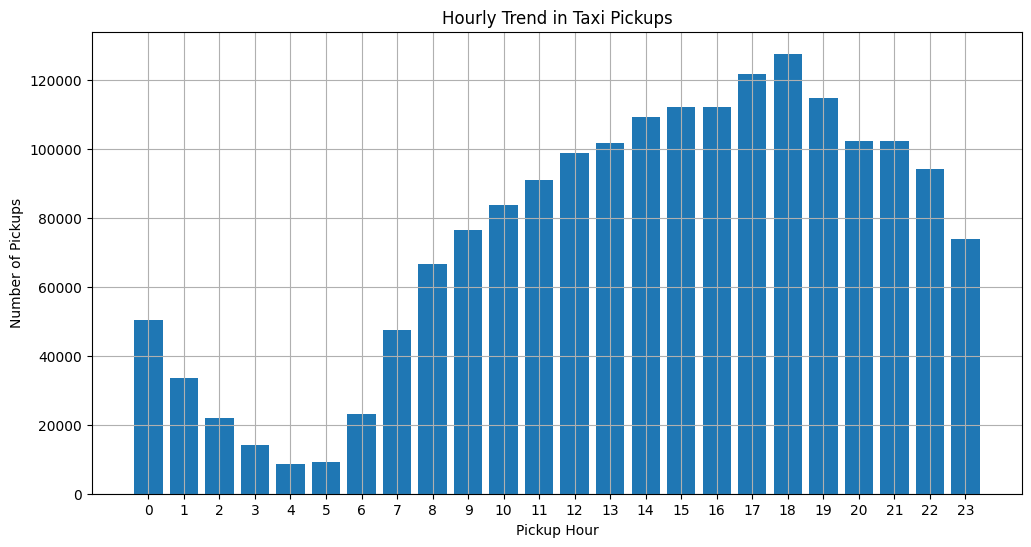

In [109]:
# Find and show the hourly trends in taxi pickups
hourly_pickups = df_imputed.groupby('tpep_pickup_hour')['VendorID'].count()
plt.figure(figsize=(12, 6))
plt.bar(hourly_pickups.index, hourly_pickups.values)  # For bar plot
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trend in Taxi Pickups')
plt.xticks(range(24))
plt.grid(True)
plt.show()

It seems by hours, during the day trip numbers are high compare to night, the number of trips peaks between 3 to 7 PM, and then continues to reduce till the early morning hours. The taxis are available 24 hours

**dayofweek**

In [110]:
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
dayofweek_dtype = pd.CategoricalDtype(categories=dayofweek_order, ordered=True)

In [111]:
df_imputed['tpep_dayofweek'] = df_imputed['tpep_pickup_datetime'].dt.day_name()
df_imputed['tpep_dayofweek'] = df_imputed['tpep_dayofweek'].astype(dayofweek_dtype)

<ipython-input-112-852a498307aa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dayofweek_pickups = df_imputed.groupby('tpep_dayofweek')['VendorID'].count()


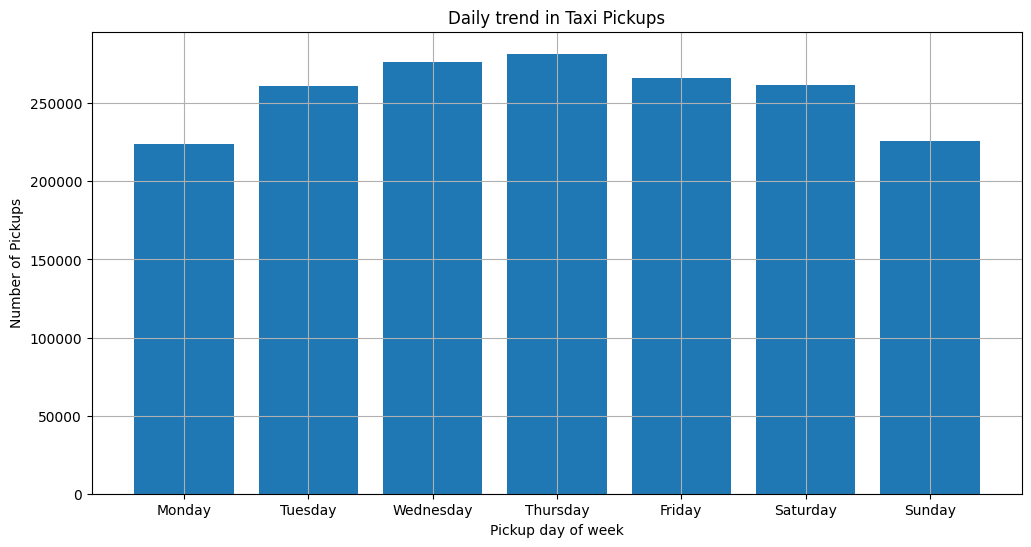

In [112]:
# Find and show the daily trends in taxi pickups (days of the week)
dayofweek_pickups = df_imputed.groupby('tpep_dayofweek')['VendorID'].count()
plt.figure(figsize=(12, 6))
plt.bar(dayofweek_pickups.index, dayofweek_pickups.values)
plt.xlabel('Pickup day of week')
plt.ylabel('Number of Pickups')
plt.title('Daily trend in Taxi Pickups')
plt.grid(True)
plt.show()


Going by the day of week, number of trips seems to be less in the beginning of the week, it continues to increase throughout the week, thursday has highest number of trips

*Monthly*

In [113]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_dtype = pd.CategoricalDtype(categories=month_order, ordered=True)

In [114]:
df_imputed['tpep_month'] = df_imputed['tpep_pickup_datetime'].dt.month_name()
df_imputed['tpep_month'] = df_imputed['tpep_month'].astype(month_dtype)

<ipython-input-115-8d802fa91ca2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_pickups = df_imputed.groupby('tpep_month')['VendorID'].count()


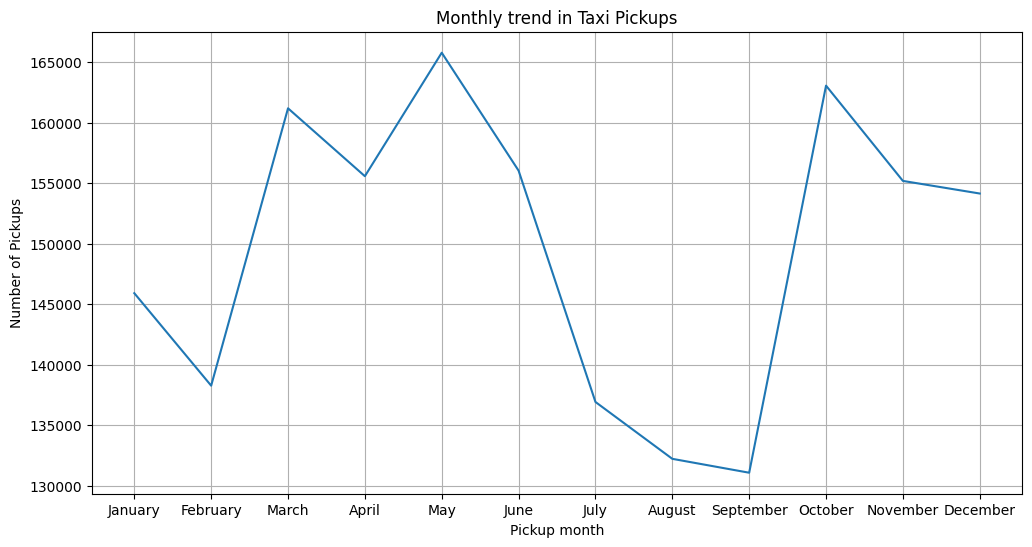

In [115]:
# Show the monthly trends in pickups
monthly_pickups = df_imputed.groupby('tpep_month')['VendorID'].count()
plt.figure(figsize=(12, 6))
plt.plot(monthly_pickups.index, monthly_pickups.values)
plt.xlabel('Pickup month')
plt.ylabel('Number of Pickups')
plt.title('Monthly trend in Taxi Pickups')
plt.grid(True)
plt.show()


August has least number of trips compare to other months

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [116]:
# Analyse the above parameters
df_imputed[['fare_amount','tip_amount','total_amount','trip_distance']].describe()

fare_amount  tip_amount  total_amount  trip_distance
count   1795424.00  1795424.00    1795424.00     1795424.00
mean         19.12        3.51         28.16           3.38
std          16.72        3.73         21.16           4.36
min           0.00        0.00          1.50           0.00
25%           9.30        1.00         15.95           1.07
50%          13.50        2.86         21.00           1.78
75%          21.20        4.42         30.24           3.31
max        1375.00      103.84       1435.19         204.86

1. tip_amount,total_amount did have negative values, I have removed them since they dont make sense.
2. fare_amount	did not have any negative values
3. trip_distance having zero makes sense if pickup and drop off location is same
4. tip amount can be zero, every trip do not have a tip amount
5. fare_amount zero need to be checked

In [117]:
df_imputed[df_imputed['fare_amount']==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7700            2  2023-01-03 08:27:38   2023-01-03 08:59:16             1.00   
32767           2  2023-01-08 11:18:17   2023-01-08 11:18:24             2.00   
44344           1  2023-01-10 21:32:31   2023-01-10 21:33:07             1.00   
57766           2  2023-01-13 14:17:30   2023-01-13 14:17:45             1.00   
61755           2  2023-01-14 04:18:47   2023-01-14 06:08:25             1.00   
...           ...                  ...                   ...              ...   
1678261         2  2023-11-20 13:53:12   2023-11-20 13:54:07             1.00   
1708175         2  2023-11-27 10:31:06   2023-11-27 10:31:54             1.00   
1709212         2  2023-11-27 14:24:21   2023-11-27 14:36:13             1.00   
1712375         2  2023-11-28 08:27:59   2023-11-28 08:28:48             1.00   
1835515         2  2023-12-18 07:49:40   2023-12-18 08:06:53             1.00   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
7700              8.34        1.00           161           244             2   
32767             0.01        2.00           142           142             2   
44344             0.00        4.00           164           164             3   
57766             0.00        1.00           260           260             2   
61755            68.16        1.00            78           265             2   
...                ...         ...           ...           ...           ...   
1678261           0.20        1.00           138           138             2   
1708175           0.02        1.00           231           231             4   
1709212           1.59        1.00           239           141             2   
1712375           0.04        1.00           231           231             2   
1835515           1.90        5.00           142           142             2   

         fare_amount  ...  tolls_amount  improvement_surcharge  total_amount  \
7700            0.00  ...          0.00                   1.00          4.00   
32767           0.00  ...          0.00                   1.00          4.00   
44344           0.00  ...          0.00                   1.00          5.00   
57766           0.00  ...          0.00                   1.00          1.50   
61755           0.00  ...          0.00                   1.00          1.50   
...              ...  ...           ...                    ...           ...   
1678261         0.00  ...          0.00                   1.00          3.25   
1708175         0.00  ...          0.00                   1.00          4.00   
1709212         0.00  ...          0.00                   1.00          4.00   
1712375         0.00  ...          0.00                   1.00          4.00   
1835515         0.00  ...          0.00                   1.00          4.00   

         congestion_surcharge  tpep_pickup_date  tpep_pickup_hour  \
7700                     2.50        2023-01-03                 8   
32767                    2.50        2023-01-08                11   
44344                    2.50        2023-01-10                21   
57766                    0.00        2023-01-13                14   
61755                    0.00        2023-01-14                 4   
...                       ...               ...               ...   
1678261                  0.00        2023-11-20                13   
1708175                  2.50        2023-11-27                10   
1709212                  2.50        2023-11-27                14   
1712375                  2.50        2023-11-28                 8   
1835515                  2.50        2023-12-18                 7   

         airport_fee trip_duration  tpep_dayofweek  tpep_month  
7700            0.00          0.53         Tuesday     January  
32767           0.00          0.00          Sunday     January  
44344           0.00          0.01         Tuesday     January  
57766           0.00     

if the fare amount is zero and dropoff and pickup location is same we can keep those records, else we can remove them

Zero fare amount seems to be erroneous data, as they have good tripdistance value, different location for pickup and drop
So its better to remove them

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [118]:
df_imputed.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_date', 'tpep_pickup_hour',
       'airport_fee', 'trip_duration', 'tpep_dayofweek', 'tpep_month'],
      dtype='object')

In [119]:
# Create a df with non zero entries for the selected parameters.
df_imputed = df_imputed[(df_imputed['fare_amount']>0) & (df_imputed['tip_amount']>0) & (df_imputed['total_amount']>0) & (df_imputed['trip_distance']>0) |
               ((df_imputed['fare_amount']==0)&(df_imputed['PULocationID']==df_imputed['DOLocationID']))]

In [120]:
len(df_imputed)

1403012

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [121]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_imputed.groupby('tpep_month')['total_amount'].sum()
monthly_revenue

<ipython-input-121-ee3793455f3b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = df_imputed.groupby('tpep_month')['total_amount'].sum()


tpep_month
January     3151589.07
February    3000052.13
March       3604726.49
April       3487128.12
May         3832875.16
June        3588752.23
July        3039549.04
August      2935079.12
September   3093913.38
October     3861230.27
November    3633243.36
December    3529590.68
Name: total_amount, dtype: float64

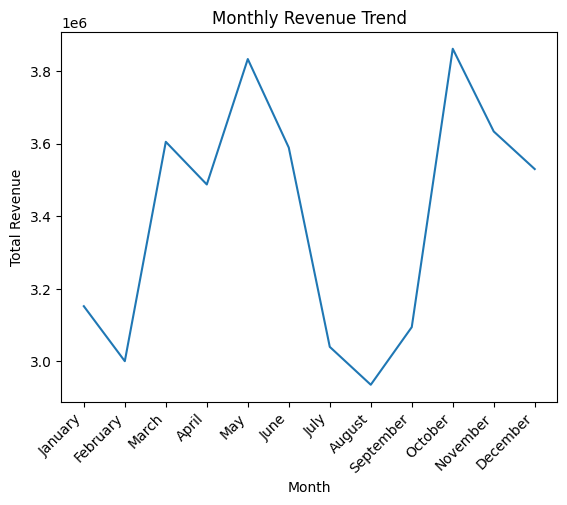

In [122]:
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [123]:
# Calculate proportion of each quarter
df_imputed['quarter'] = df_imputed['tpep_pickup_datetime'].dt.quarter
quarterly_revenue_proportion = df_imputed.groupby('quarter')['total_amount'].sum()/df_imputed['total_amount'].sum()*100
quarterly_revenue_proportion

quarter
1   23.94
2   26.76
3   22.25
4   27.05
Name: total_amount, dtype: float64

In [124]:
df_imputed.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46             2.00   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33             2.00   
6         2  2023-01-01 00:58:00   2023-01-01 01:08:31             2.00   
7         2  2023-01-01 00:16:06   2023-01-01 00:31:59             1.00   
8         2  2023-01-01 00:44:09   2023-01-01 01:01:17             1.00   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1           1.24        1.00           161           237             1   
5           7.10        1.00           246            37             1   
6           1.59        1.00            79           164             1   
7           3.16        1.00            79           256             1   
8           7.64        1.00           132            95             1   

   fare_amount  ...  improvement_surcharge  total_amount  \
1         7.90  ...                   1.00         15.48   
5        34.50  ...                   1.00         47.40   
6        11.40  ...                   1.00         19.68   
7        19.10  ...                   1.00         30.12   
8        31.70  ...                   1.00         42.54   

   congestion_surcharge  tpep_pickup_date  tpep_pickup_hour  airport_fee  \
1                  2.50        2023-01-01                 0         0.00   
5                  2.50        2023-01-01                 0         0.00   
6                  2.50        2023-01-01                 0         0.00   
7                  2.50        2023-01-01                 0         0.00   
8                  0.00        2023-01-01                 0         1.25   

   trip_duration tpep_dayofweek  tpep_month  quarter  
1           0.08         Sunday     January        1  
5           0.56         Sunday     January        1  
6           0.18         Sunday     January        1  
7           0.26         Sunday     January        1  
8           0.29         Sunday     January        1  

[5 rows x 24 columns]

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

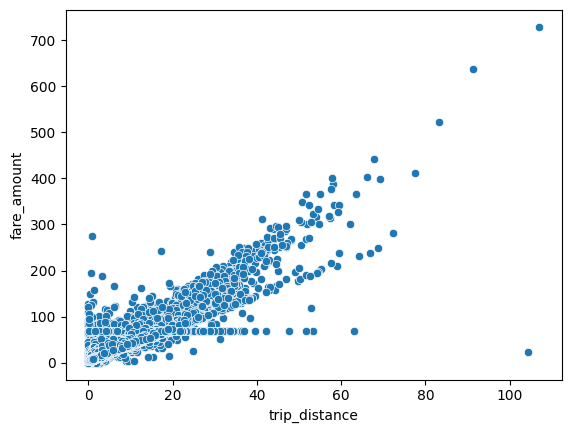

In [125]:
# Show how trip fare is affected by distance
df_data = df_imputed[df_imputed['trip_distance']>0]
sns.scatterplot(x=df_data["trip_distance"],y=df_data["fare_amount"])
plt.show()

In [126]:
df_data[['trip_distance','fare_amount']].corr()

trip_distance  fare_amount
trip_distance           1.00         0.96
fare_amount             0.96         1.00

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

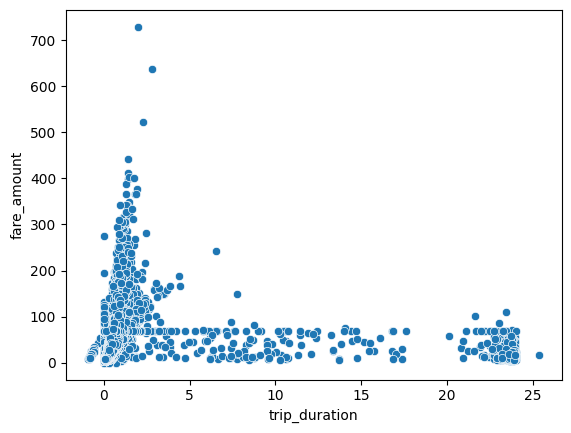

In [127]:
# Show relationship between fare and trip duration
sns.scatterplot(x=df_imputed["trip_duration"],y=df_imputed["fare_amount"])
plt.show()

In [128]:
df_data[['trip_duration','fare_amount']].corr()

trip_duration  fare_amount
trip_duration           1.00         0.33
fare_amount             0.33         1.00

In [129]:
df_imputed.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_date', 'tpep_pickup_hour',
       'airport_fee', 'trip_duration', 'tpep_dayofweek', 'tpep_month',
       'quarter'],
      dtype='object')

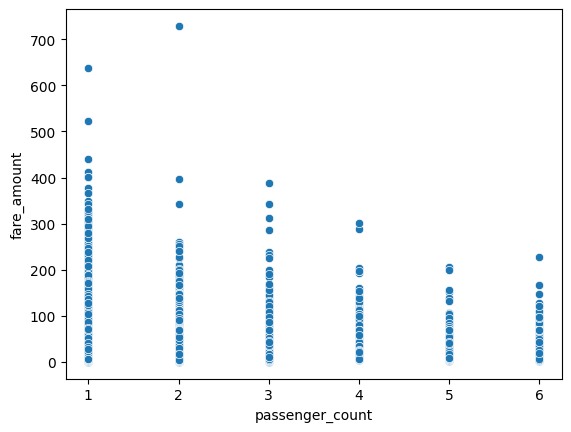

In [130]:
# Show relationship between fare and number of passengers
sns.scatterplot(x=df_imputed["passenger_count"],y=df_imputed["fare_amount"])
plt.show()


In [131]:
df_data[['passenger_count','fare_amount']].corr()

passenger_count  fare_amount
passenger_count             1.00         0.03
fare_amount                 0.03         1.00

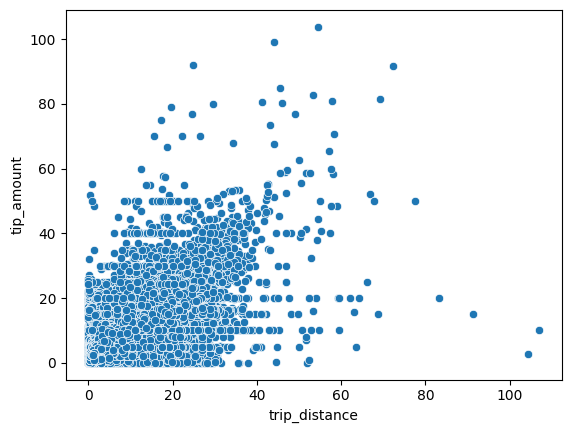

In [132]:
# Show relationship between tip and trip distance
sns.scatterplot(x=df_imputed["trip_distance"],y=df_imputed["tip_amount"])
plt.show()


In [133]:
df_data[['trip_distance','tip_amount']].corr()

trip_distance  tip_amount
trip_distance           1.00        0.83
tip_amount              0.83        1.00

**3.1.8** <font color = red>[3 marks]</font> <br>

---



---


Analyse the distribution of different payment types (`payment_type`)

In [134]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df_imputed['payment_type'].value_counts()
payment_type_proportions = payment_type_counts / payment_type_counts.sum()

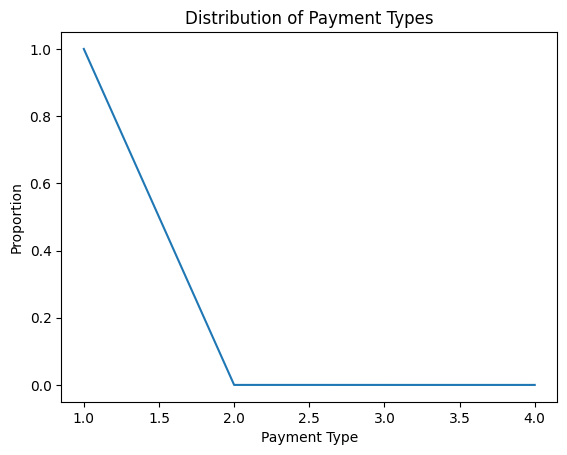

In [135]:
# Create a bar plot
sns.lineplot(x=payment_type_proportions.index, y=payment_type_proportions.values)
plt.xlabel('Payment Type')
plt.ylabel('Proportion')
plt.title('Distribution of Payment Types')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [136]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [137]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1        0.12        0.00           Newark Airport           1   
1         2        0.43        0.00              Jamaica Bay           2   
2         3        0.08        0.00  Allerton/Pelham Gardens           3   
3         4        0.04        0.00            Alphabet City           4   
4         5        0.09        0.00            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

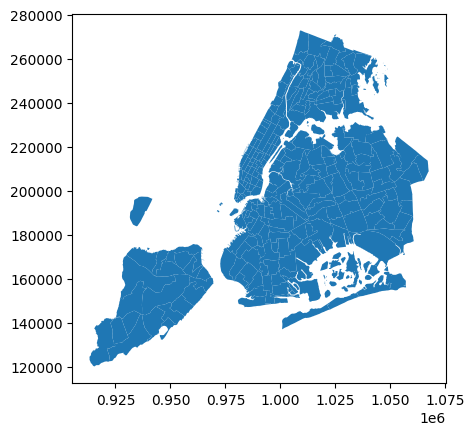

In [138]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [139]:
# Merge zones and trip records using locationID and PULocationID
merged_df = df_imputed.merge(zones,left_on='PULocationID',right_on='LocationID',how='inner')
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46             2.00   
1         1  2023-01-01 00:42:56   2023-01-01 01:16:33             2.00   
2         2  2023-01-01 00:58:00   2023-01-01 01:08:31             2.00   
3         2  2023-01-01 00:16:06   2023-01-01 00:31:59             1.00   
4         2  2023-01-01 00:44:09   2023-01-01 01:01:17             1.00   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.24        1.00           161           237             1   
1           7.10        1.00           246            37             1   
2           1.59        1.00            79           164             1   
3           3.16        1.00            79           256             1   
4           7.64        1.00           132            95             1   

   fare_amount  ...  tpep_dayofweek  tpep_month  quarter  OBJECTID  \
0         7.90  ...          Sunday     January        1       161   
1        34.50  ...          Sunday     January        1       246   
2        11.40  ...          Sunday     January        1        79   
3        19.10  ...          Sunday     January        1        79   
4        31.70  ...          Sunday     January        1       132   

   Shape_Leng  Shape_Area                       zone LocationID    borough  \
0        0.04        0.00             Midtown Center        161  Manhattan   
1        0.07        0.00  West Chelsea/Hudson Yards        246  Manhattan   
2        0.04        0.00               East Village         79  Manhattan   
3        0.04        0.00               East Village         79  Manhattan   
4        0.25        0.00                JFK Airport        132     Queens   

                                            geometry  
0  POLYGON ((991081.026 214453.698, 990952.644 21...  
1  POLYGON ((983031.177 217138.506, 983640.32 216...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((988746.067 202151.955, 988733.885 20...  
4  MULTIPOLYGON (((1032791.001 181085.006, 103283...  

[5 rows x 31 columns]

In [140]:
len(merged_df)

1390818

In [141]:
len(merged_df['LocationID'].unique())

212

In [142]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_date', 'tpep_pickup_hour',
       'airport_fee', 'trip_duration', 'tpep_dayofweek', 'tpep_month',
       'quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID',
       'borough', 'geometry'],
      dtype='object')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [143]:
# Group data by location and calculate the number of trips
tripcount_bylocation = merged_df.groupby(['LocationID','zone'])['VendorID'].count().reset_index()
tripcount_bylocation.columns = ['LocationID','zone', 'TripCount']
print(tripcount_bylocation.sort_values(by=['TripCount']))

     LocationID                   zone  TripCount
7            11             Bath Beach          1
14           20                Belmont          1
13           18           Bedford Park          1
11           16                Bayside          1
28           38        Cambria Heights          1
..          ...                    ...        ...
128         162           Midtown East      52366
103         132            JFK Airport      62567
188         236  Upper East Side North      63547
127         161         Midtown Center      67226
189         237  Upper East Side South      69683

[212 rows x 3 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [144]:
# Merge trip counts back to the zones GeoDataFrame
trip_zone_df = zones.merge(tripcount_bylocation, on='LocationID', how='inner')
trip_zone_df.head()

OBJECTID  Shape_Leng  Shape_Area          zone_x  LocationID    borough  \
0         1        0.12        0.00  Newark Airport           1        EWR   
1         2        0.43        0.00     Jamaica Bay           2     Queens   
2         4        0.04        0.00   Alphabet City           4  Manhattan   
3         7        0.11        0.00         Astoria           7     Queens   
4         8        0.03        0.00    Astoria Park           8     Queens   

                                            geometry          zone_y  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...  Newark Airport   
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...     Jamaica Bay   
2  POLYGON ((992073.467 203714.076, 992068.667 20...   Alphabet City   
3  POLYGON ((1010804.218 218919.641, 1011049.165 ...         Astoria   
4  POLYGON ((1005482.276 221686.466, 1005304.898 ...    Astoria Park   

   TripCount  
0          5  
1          2  
2       1396  
3        247  
4          2

In [145]:
len(trip_zone_df)

213

In [146]:
trip_zone_df.sort_values(by=['LocationID'])

OBJECTID  Shape_Leng  Shape_Area              zone_x  LocationID  \
0           1        0.12        0.00      Newark Airport           1   
1           2        0.43        0.00         Jamaica Bay           2   
2           4        0.04        0.00       Alphabet City           4   
3           7        0.11        0.00             Astoria           7   
4           8        0.03        0.00        Astoria Park           8   
..        ...         ...         ...                 ...         ...   
208       258        0.09        0.00           Woodhaven         258   
209       260        0.13        0.00            Woodside         260   
210       261        0.03        0.00  World Trade Center         261   
211       262        0.05        0.00      Yorkville East         262   
212       263        0.04        0.00      Yorkville West         263   

       borough                                           geometry  \
0          EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1       Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2    Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
3       Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...   
4       Queens  POLYGON ((1005482.276 221686.466, 1005304.898 ...   
..         ...                                                ...   
208     Queens  POLYGON ((1027223.758 190451.926, 1027233.961 ...   
209     Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
210  Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
211  Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
212  Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

                 zone_y  TripCount  
0        Newark Airport          5  
1           Jamaica Bay          2  
2         Alphabet City       1396  
3               Astoria        247  
4          Astoria Park          2  
..                  ...        ...  
208           Woodhaven          1  
209            Woodside         89  
210  World Trade Center       6802  
211      Yorkville East      19266  
212      Yorkville West      27828  

[213 rows x 9 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

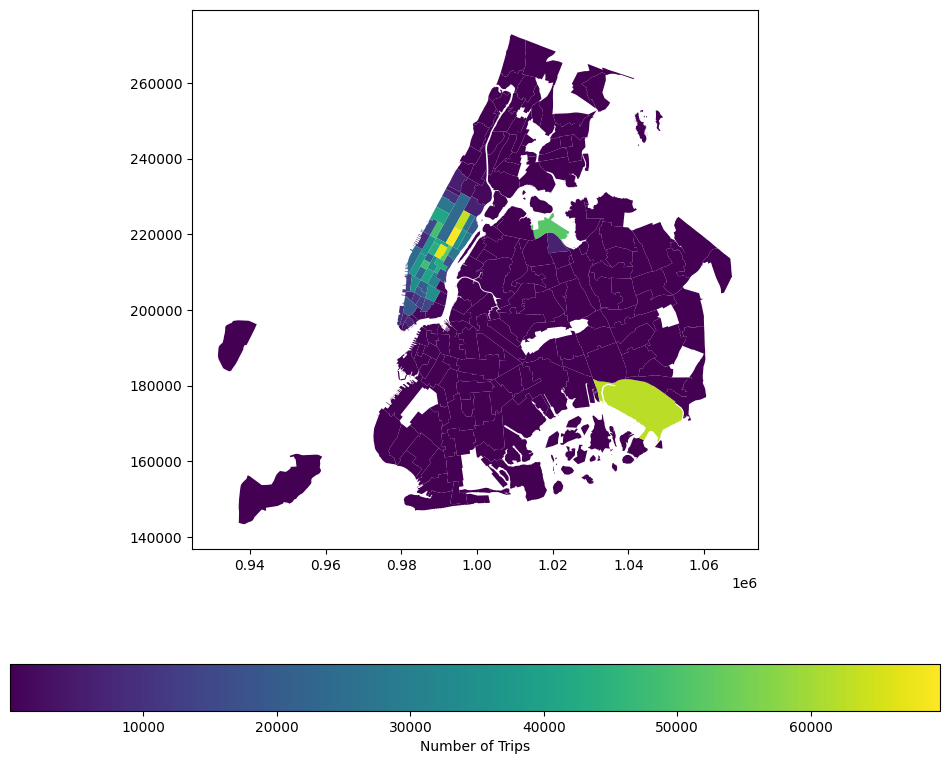

In [147]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
trip_zone_df.plot(column='TripCount',
                  ax=ax,
                  legend=True,
                  cmap='viridis',
                  legend_kwds={'label': "Number of Trips",
                               'orientation': "horizontal"})
plt.show()

In [148]:
# can you try displaying the zones DF sorted by the number of trips?
pd.set_option("display.max_rows", None)
trip_zone_df.sort_values(by=['TripCount'])


OBJECTID  Shape_Leng  Shape_Area                               zone_x  \
7          11        0.08        0.00                           Bath Beach   
14         20        0.05        0.00                              Belmont   
13         18        0.07        0.00                         Bedford Park   
11         16        0.14        0.00                              Bayside   
28         38        0.08        0.00                      Cambria Heights   
16         22        0.13        0.00                     Bensonhurst West   
40         51        0.10        0.00                           Co-Op City   
35         46        0.13        0.00                          City Island   
51         64        0.18        0.00                           Douglaston   
91        118        0.24        0.00          Heartland Village/Todt Hill   
67         81        0.20        0.00                          Eastchester   
108       136        0.09        0.00                  Kingsbridge Heights   
98        126        0.13        0.00                          Hunts Point   
64         77        0.08        0.00    East New York/Pennsylvania Avenue   
139       173        0.06        0.00                         North Corona   
134       167        0.09        0.00                   Morrisania/Melrose   
193       240        0.15        0.00                   Van Cortlandt Park   
200       248        0.06        0.00               West Farms/Bronx River   
164       205        0.14        0.00                         Saint Albans   
176       222        0.05        0.00                        Starrett City   
146       182        0.04        0.00                          Parkchester   
142       178        0.07        0.00                  Ocean Parkway South   
204       253        0.04        0.00                        Willets Point   
208       258        0.09        0.00                            Woodhaven   
36         47        0.09        0.00                   Claremont/Bathgate   
80         98        0.12        0.00                        Fresh Meadows   
82        101        0.10        0.00                            Glen Oaks   
50         63        0.12        0.00                        Cypress Hills   
47         59        0.04        0.00                         Crotona Park   
25         35        0.09        0.00                          Brownsville   
58         71        0.09        0.00               East Flatbush/Farragut   
5           9        0.10        0.00                           Auburndale   
153       192        0.11        0.00                      Queensboro Hill   
138       171        0.11        0.00                   Murray Hill-Queens   
188       235        0.08        0.00    University Heights/Morris Heights   
160       199        0.08        0.00                        Rikers Island   
132       165        0.09        0.00                              Midwood   
147       185        0.09        0.00                       Pelham Parkway   
4           8        0.03        0.00                         Astoria Park   
119       150        0.09        0.00                      Manhattan Beach   
75         91        0.12        0.00                            Flatlands   
1           2        0.43        0.00                          Jamaica Bay   
202       250        0.08        0.00        Westchester Village/Unionport   
203       252        0.16        0.00                           Whitestone   
141       177        0.07        0.00                           Ocean Hill   
144       180        0.08        0.00                           Ozone Park   
163       203        0.19        0.00                             Rosedale   
173       218        0.08        0.00            Springfield Gardens North   
122       154        0.23        0.00      Marine Park/Floyd Bennett Field   
86        108        0.11        0.00                            Gravesend   
70         85        0.06  

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [149]:
# Find routes which have the slowest speeds at different times of the day

# average trip duration for a hour
route_hourly_data = merged_df.groupby(['PULocationID', 'DOLocationID', 'tpep_pickup_hour'])[['trip_duration']].mean().reset_index()
route_hourly_data.columns = ['PULocationID', 'DOLocationID', 'tpep_pickup_hour', 'avg_trip_duration']
# considering absolute value of avg trip duration
route_hourly_data['avg_trip_duration'] = route_hourly_data['avg_trip_duration'].abs()

In [150]:
route_hourly_data.head()

PULocationID  DOLocationID  tpep_pickup_hour  avg_trip_duration
0             1             1                 6               0.10
1             1             1                16               0.00
2             1            87                 6               0.69
3             1           265                13               0.76
4             1           265                19               0.45

In [151]:
len(route_hourly_data)

100336

In [152]:
temp_df = merged_df[['PULocationID', 'DOLocationID', 'tpep_pickup_hour', 'trip_distance']]
temp_df.drop_duplicates(inplace=True)
route_hourly_duration = pd.merge(route_hourly_data, temp_df
                                 , on=['PULocationID', 'DOLocationID', 'tpep_pickup_hour'], how='inner')

<ipython-input-152-f1f5ce210489>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(inplace=True)


In [153]:
route_hourly_duration = route_hourly_duration[['PULocationID', 'DOLocationID', 'tpep_pickup_hour', 'avg_trip_duration', 'trip_distance']]
route_hourly_duration.drop_duplicates(inplace=True)

In [154]:
len(route_hourly_duration)

1061467

In [155]:
route_hourly_duration['speed'] = route_hourly_duration.apply(lambda row: row['trip_distance'] / row['avg_trip_duration'] if row['avg_trip_duration'] != 0 else 0, axis=1)

In [156]:
route_hourly_duration = (route_hourly_duration[(route_hourly_duration['trip_distance']>0)&
 (route_hourly_duration['avg_trip_duration']>0)&(route_hourly_duration['PULocationID']!=route_hourly_duration['DOLocationID'])])

In [157]:
len(route_hourly_duration)

1034842

In [158]:
route_hourly_duration.sort_values(by=['speed'],ascending=True,inplace=True)

In [159]:
slowest_routes = route_hourly_duration.head(5)
slowest_routes

PULocationID  DOLocationID  tpep_pickup_hour  avg_trip_duration  \
972622           243           264                17              23.16   
4998              13           132                12               0.95   
354423           138           163                14               0.73   
336362           138            66                18               0.57   
288124           132           149                13               0.50   

        trip_distance  speed  
972622           0.18   0.01  
4998             0.01   0.01  
354423           0.01   0.01  
336362           0.01   0.02  
288124           0.01   0.02

In [160]:
step = pd.merge(slowest_routes,zones,left_on='PULocationID',right_on='LocationID',how='left')
step1 = pd.merge(step,zones,left_on='DOLocationID',right_on='LocationID',how='left')
step1[['PULocationID','zone_x','DOLocationID','zone_y','tpep_pickup_hour','avg_trip_duration','trip_distance','speed']]

PULocationID                    zone_x  DOLocationID              zone_y  \
0           243  Washington Heights North           264                 NaN   
1            13         Battery Park City           132         JFK Airport   
2           138         LaGuardia Airport           163       Midtown North   
3           138         LaGuardia Airport            66  DUMBO/Vinegar Hill   
4           132               JFK Airport           149             Madison   

   tpep_pickup_hour  avg_trip_duration  trip_distance  speed  
0                17              23.16           0.18   0.01  
1                12               0.95           0.01   0.01  
2                14               0.73           0.01   0.01  
3                18               0.57           0.01   0.02  
4                13               0.50           0.01   0.02

How does identifying high-traffic, high-demand routes help us?

By identifying high traffic routes we can plan for alternate routes for passenger comfort
By identifying hiugh demand routes, companies can place their taxis in those routes, reducing passenger wait time, and work pressure on the drivers
Increased revenue, smoother operation

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [161]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trip_counts = merged_df.groupby(merged_df['tpep_pickup_hour'])['VendorID'].count()

In [162]:
# Find the busiest hour
busiest_hour = hourly_trip_counts.idxmax()
trips_during_busiest_hour = hourly_trip_counts.max()

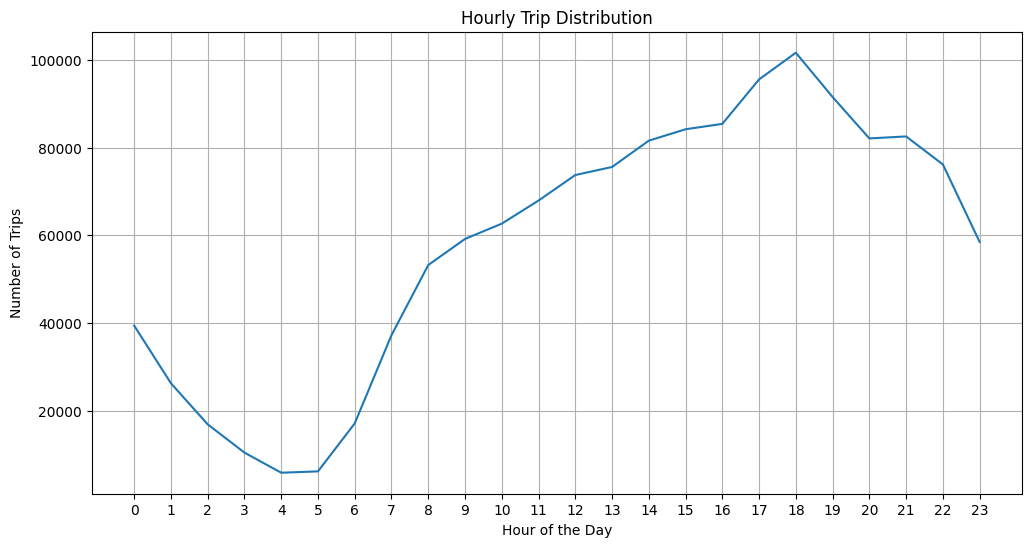

In [163]:
# Visualize the hourly trip distribution
plt.figure(figsize=(12, 6))
plt.plot(hourly_trip_counts.index, hourly_trip_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Trip Distribution')
plt.xticks(range(24))  # Set x-axis ticks to represent each hour
plt.grid(True)
plt.show()

In [164]:
# Print the busiest hour and trip count
print(f"The busiest hour is {busiest_hour}:00 with {trips_during_busiest_hour} trips.")

The busiest hour is 18:00 with 101628 trips.


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [165]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.05

# Scale up the trip counts
hourly_trip_counts_scaled = hourly_trip_counts / sample_fraction

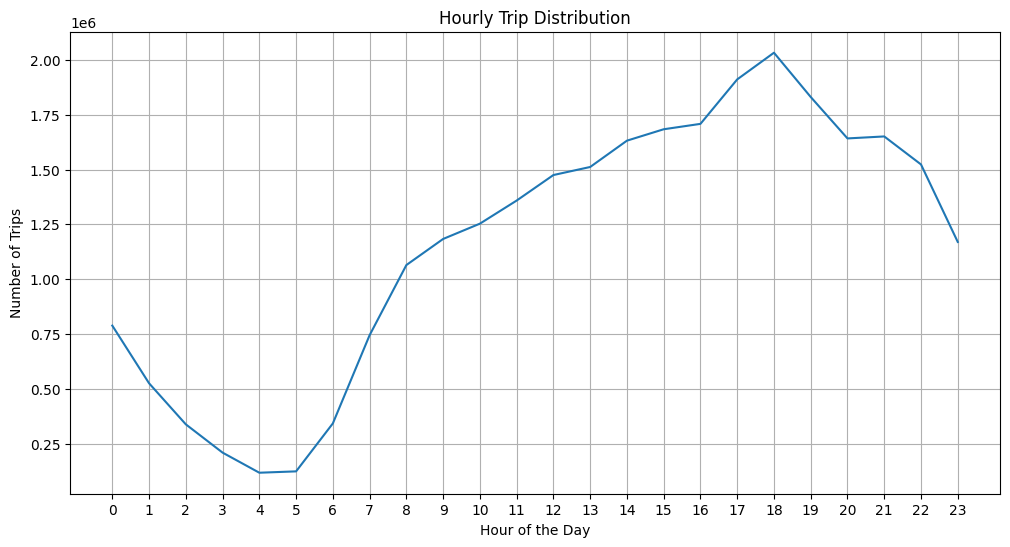

The busiest hour is 18:00 with 2032560.0 trips.


In [166]:
# Find the busiest hour (after scaling)
busiest_hour_scaled = hourly_trip_counts_scaled.idxmax()
trips_during_busiest_hour_scaled = hourly_trip_counts_scaled.max()

# Visualize the hourly trip distribution
plt.figure(figsize=(12, 6))
plt.plot(hourly_trip_counts_scaled.index, hourly_trip_counts_scaled.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Trip Distribution')
plt.xticks(range(24))  # Set x-axis ticks to represent each hour
plt.grid(True)
plt.show()

# Print the busiest hour and trip count
print(f"The busiest hour is {busiest_hour_scaled}:00 with {trips_during_busiest_hour_scaled} trips.")

In [167]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_date', 'tpep_pickup_hour',
       'airport_fee', 'trip_duration', 'tpep_dayofweek', 'tpep_month',
       'quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID',
       'borough', 'geometry'],
      dtype='object')

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [168]:
# Compare traffic trends for the week days and weekends

hourly_trip_counts_by_day_type = merged_df.groupby(['tpep_dayofweek', 'tpep_pickup_hour'])['VendorID'].count().reset_index()

<ipython-input-168-fe41ddba6925>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_trip_counts_by_day_type = merged_df.groupby(['tpep_dayofweek', 'tpep_pickup_hour'])['VendorID'].count().reset_index()


In [169]:
# Separate data for weekdays and weekends
weekday_data = hourly_trip_counts_by_day_type[hourly_trip_counts_by_day_type['tpep_dayofweek'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]

In [170]:
weekday_data = weekday_data.groupby(['tpep_dayofweek','tpep_pickup_hour'])['VendorID'].sum().reset_index()

<ipython-input-170-388315b4932d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_data = weekday_data.groupby(['tpep_dayofweek','tpep_pickup_hour'])['VendorID'].sum().reset_index()


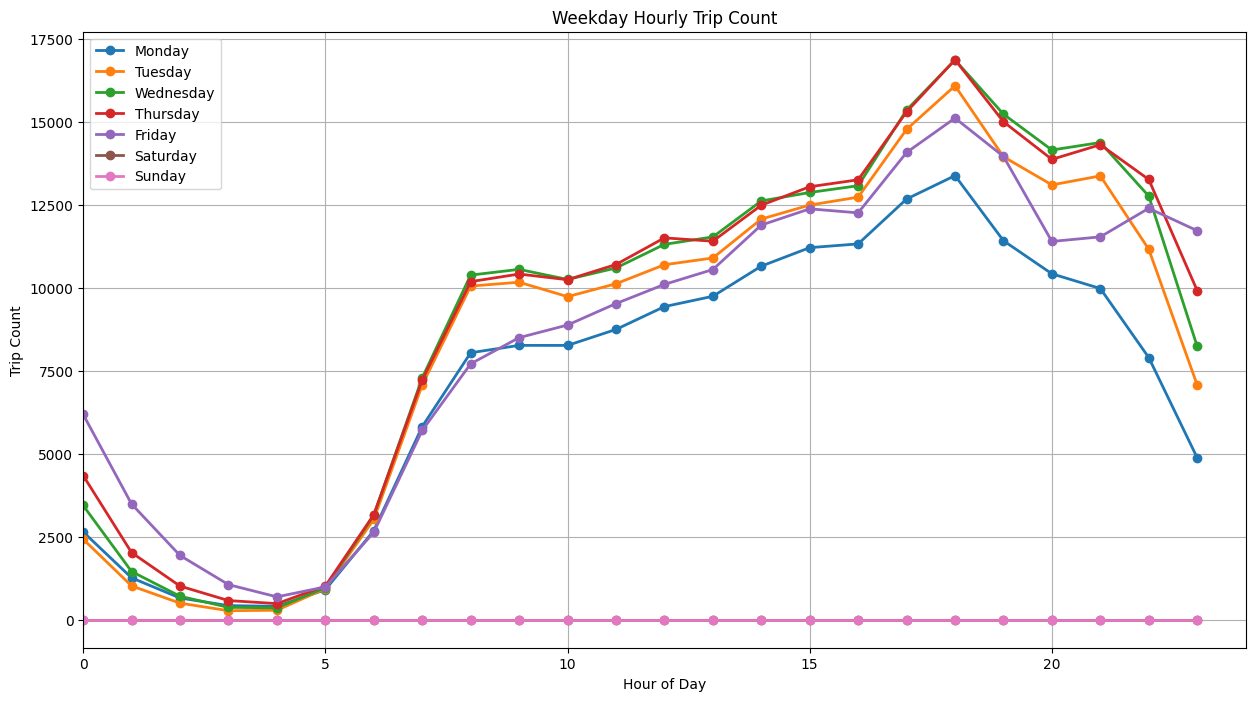

In [171]:
plt.figure(figsize=(15, 8))
for day in weekday_data['tpep_dayofweek'].unique():
    day_data = weekday_data[weekday_data['tpep_dayofweek'] == day].groupby(weekday_data['tpep_pickup_hour'])['VendorID'].sum()
    plt.plot(day_data.index, day_data.values, label=day,marker='o', linewidth=2)
plt.title("Weekday Hourly Trip Count")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.xlim(0, 24)
plt.legend()
plt.grid(True)
plt.show()

Busiest day is Thursday, busiest hour is 6 PM, quitest day is Monday, quitest hour is 3 or 4 AM in the morning

In [172]:
weekend_data = hourly_trip_counts_by_day_type[hourly_trip_counts_by_day_type['tpep_dayofweek'].isin(['Saturday','Sunday'])]

In [173]:
weekend_data = weekend_data.groupby(['tpep_dayofweek','tpep_pickup_hour'])['VendorID'].sum().reset_index()

<ipython-input-173-37997f41e803>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekend_data = weekend_data.groupby(['tpep_dayofweek','tpep_pickup_hour'])['VendorID'].sum().reset_index()


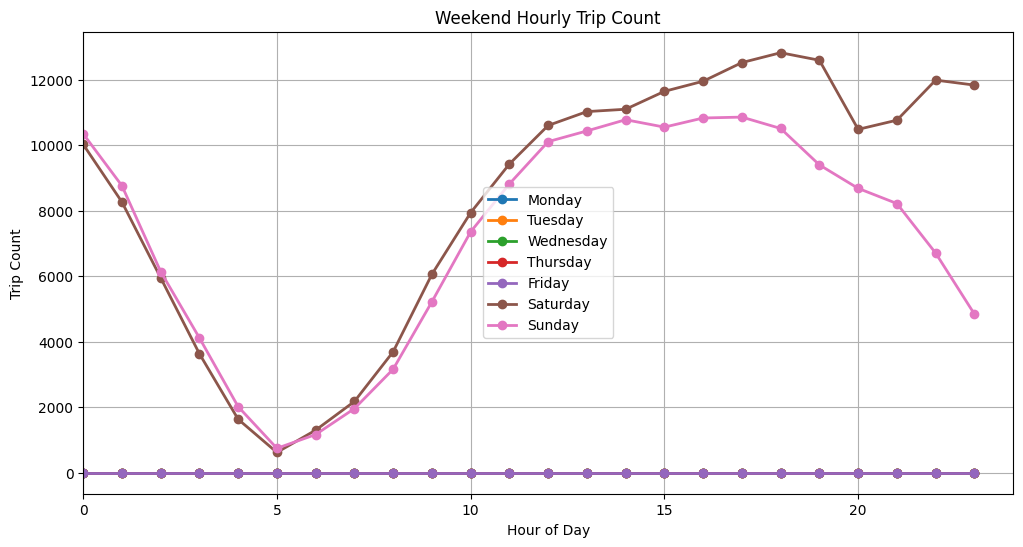

In [174]:
plt.figure(figsize=(12, 6))
for day in weekend_data['tpep_dayofweek'].unique():
    day_data = weekend_data[weekend_data['tpep_dayofweek'] == day].groupby(weekend_data['tpep_pickup_hour'])['VendorID'].sum()
    plt.plot(day_data.index, day_data.values, label=day,marker='o', linewidth=2)
plt.title("Weekend Hourly Trip Count")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.xlim(0, 24)
plt.legend()
plt.grid(True)
plt.show()

Busiest day is Saturday, busiest hour is 6 PM, quitest day is Sunday, quitest hour is 5 AM in the morning

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [175]:
# Find top 10 pickup and dropoff zones

hourly_pickups_by_zone = merged_df.groupby(['PULocationID', 'tpep_pickup_hour'])['VendorID'].count().reset_index()
top_10_pickup_zones = hourly_pickups_by_zone.groupby('PULocationID')['VendorID'].count().nlargest(10).index
top_10_pickup_data = hourly_pickups_by_zone[hourly_pickups_by_zone['PULocationID'].isin(top_10_pickup_zones)]

top_10_pickup_data.columns = ['PULocationID','tpep_pickup_hour','TripCount']

top_10_pickup_data.head()

PULocationID  tpep_pickup_hour  TripCount
6              4                 0        187
7              4                 1        230
8              4                 2        208
9              4                 3        127
10             4                 4         21

In [176]:
pickup_zone_details = pd.merge(top_10_pickup_data,df_zones,right_on='LocationID',left_on='PULocationID',how='inner')
pickup_zone_details[['PULocationID','zone']].drop_duplicates()

PULocationID                  zone
0               4         Alphabet City
24              7               Astoria
48             13     Battery Park City
72             24          Bloomingdale
96             25           Boerum Hill
120            41        Central Harlem
144            42  Central Harlem North
168            43          Central Park
192            45             Chinatown
216            48          Clinton East

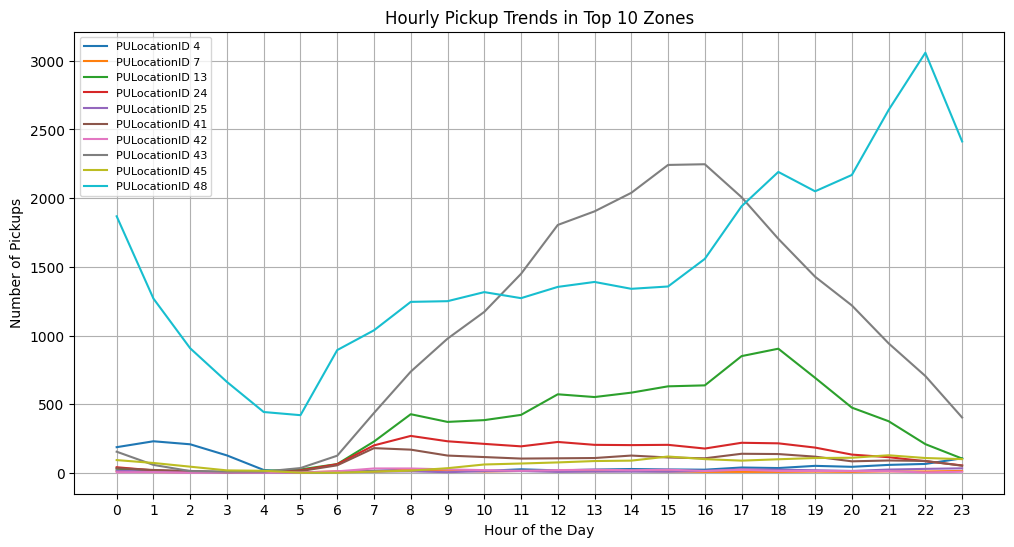

In [177]:
plt.figure(figsize=(12, 6))
for zone in top_10_pickup_zones:
    zone_data = top_10_pickup_data[top_10_pickup_data['PULocationID'] == zone]
    plt.plot(zone_data['tpep_pickup_hour'], zone_data['TripCount'], label=f'PULocationID {zone}')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends in Top 10 Zones')
plt.xticks(range(24))
plt.legend(fontsize=8)
plt.grid(True)
plt.show()


In [178]:
hourly_dropoffs_by_zone = merged_df.groupby(['DOLocationID', merged_df['tpep_dropoff_datetime'].dt.hour])['VendorID'].count().reset_index()
top_10_dropoff_zones = hourly_dropoffs_by_zone.groupby('DOLocationID')['VendorID'].count().nlargest(10).index
top_10_dropoff_data = hourly_dropoffs_by_zone[hourly_dropoffs_by_zone['DOLocationID'].isin(top_10_dropoff_zones)]
top_10_dropoff_data.columns = ['DOLocationID','tpep_dropoff_hour','TripCount']
top_10_dropoff_data.head()

DOLocationID  tpep_dropoff_hour  TripCount
37             4                  0        372
38             4                  1        236
39             4                  2        158
40             4                  3        119
41             4                  4         40

In [179]:
dropoff_zone_details = pd.merge(top_10_dropoff_data,df_zones,right_on='LocationID',left_on='DOLocationID',how='inner')
dropoff_zone_details[['DOLocationID','zone']].drop_duplicates()

DOLocationID                     zone
0               4            Alphabet City
24              7                  Astoria
48             10             Baisley Park
72             13        Battery Park City
96             14                Bay Ridge
120            17                  Bedford
144            24             Bloomingdale
168            25              Boerum Hill
192            28  Briarwood/Jamaica Hills
216            33         Brooklyn Heights

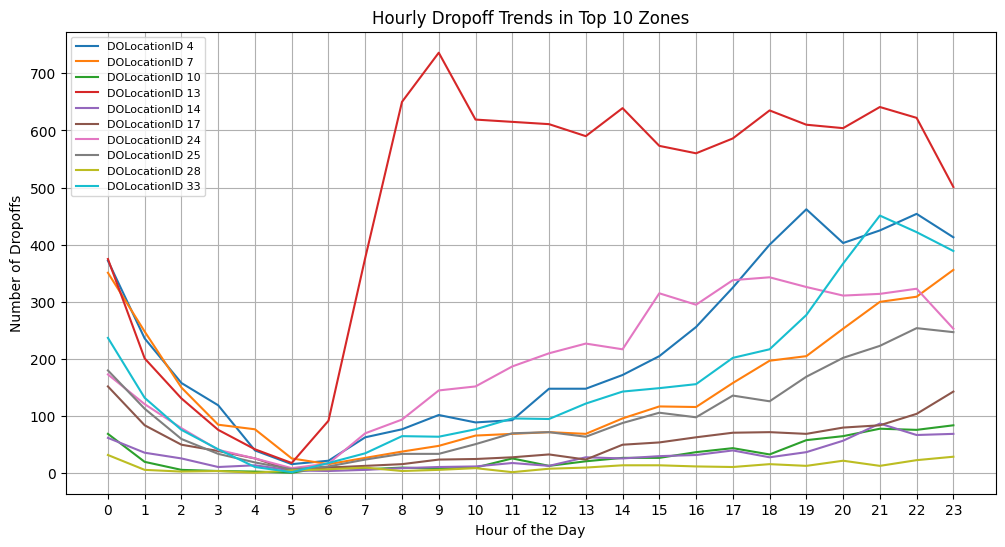

In [180]:
plt.figure(figsize=(12, 6))
for zone in top_10_dropoff_zones:
    zone_data = top_10_dropoff_data[top_10_dropoff_data['DOLocationID'] == zone]
    plt.plot(zone_data['tpep_dropoff_hour'], zone_data['TripCount'], label=f'DOLocationID {zone}')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends in Top 10 Zones')
plt.xticks(range(24))
plt.legend(fontsize=8)
plt.grid(True)
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [181]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = merged_df.groupby('PULocationID')['VendorID'].count()
dropoff_counts = merged_df.groupby('DOLocationID')['VendorID'].count()

In [182]:
zone_ratios = pd.DataFrame({'pickup_counts': pickup_counts, 'dropoff_counts': dropoff_counts})
zone_ratios['ratio'] = zone_ratios['pickup_counts'] / zone_ratios['dropoff_counts']

In [183]:
top_10_ratios = zone_ratios.sort_values(by=['ratio'], ascending=False).head(10)
bottom_10_ratios = zone_ratios.sort_values(by=['ratio'], ascending=True).head(10)

In [184]:
print("Top 10 Pickup/Dropoff Ratios:")
display(top_10_ratios)

Top 10 Pickup/Dropoff Ratios:


pickup_counts  dropoff_counts  ratio
70         6341.00          434.00  14.61
132       62567.00        12939.00   4.84
138       51196.00        17716.00   2.89
186       48289.00        29292.00   1.65
43        23820.00        17165.00   1.39
114       19752.00        14296.00   1.38
249       33770.00        25376.00   1.33
162       52366.00        41178.00   1.27
161       67226.00        55149.00   1.22
100       21134.00        17399.00   1.21

In [185]:
print("\nBottom 10 Pickup/Dropoff Ratios:")
display(bottom_10_ratios)


Bottom 10 Pickup/Dropoff Ratios:


pickup_counts  dropoff_counts  ratio
16            1.00          151.00   0.01
205           1.00          142.00   0.01
258           1.00          138.00   0.01
257           5.00          629.00   0.01
165           2.00          225.00   0.01
22            1.00          109.00   0.01
20            1.00          108.00   0.01
38            1.00          104.00   0.01
64            1.00           99.00   0.01
14            8.00          728.00   0.01

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [186]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours_data = merged_df[(merged_df['tpep_pickup_hour']>= 23) | (merged_df['tpep_pickup_hour'] < 5)]

In [187]:
night_pickup_counts = night_hours_data.groupby('PULocationID')['VendorID'].count()
night_dropoff_counts = night_hours_data.groupby('DOLocationID')['VendorID'].count()


top_10_night_pickup_zones = night_pickup_counts.nlargest(10).reset_index()
top_10_night_pickup_zones.columns =['PULocationID','PickupCount']

top_10_night_dropoff_zones = night_dropoff_counts.nlargest(10).reset_index()
top_10_night_dropoff_zones.columns =['DOLocationID','DropoffCount']

In [188]:
print("Top 10 Pickup Zones During Night Hours:")
display(pd.merge(top_10_night_pickup_zones,df_zones,left_on='PULocationID',right_on='LocationID',how='inner')[['PULocationID','zone','PickupCount']])

Top 10 Pickup Zones During Night Hours:


PULocationID                          zone  PickupCount
0            79                  East Village        12654
1           249                  West Village        10368
2           132                   JFK Airport         8677
3           148               Lower East Side         7906
4            48                  Clinton East         7562
5           114       Greenwich Village South         7234
6           230     Times Sq/Theatre District         5529
7           186  Penn Station/Madison Sq West         4834
8           164                 Midtown South         4644
9           138             LaGuardia Airport         4640

In [189]:
print("Top 10 Dropoff Zones During Night Hours:")
display(pd.merge(top_10_night_dropoff_zones,df_zones,left_on='DOLocationID',right_on='LocationID',how='inner')[['DOLocationID','zone','DropoffCount']])

Top 10 Dropoff Zones During Night Hours:


DOLocationID                           zone  DropoffCount
0            79                   East Village          6678
1            48                   Clinton East          4956
2           170                    Murray Hill          4892
3           107                       Gramercy          4755
4           141                Lenox Hill West          4347
5            68                   East Chelsea          4247
6           263                 Yorkville West          4148
7           249                   West Village          4075
8           239          Upper West Side South          3653
9           229  Sutton Place/Turtle Bay North          3572

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [190]:
# Filter for night hours (11 PM to 5 AM)

daytime_hours = merged_df[(merged_df['tpep_pickup_hour'] >= 6) & (merged_df['tpep_pickup_hour'] < 23)]
nighttime_hours = merged_df[(merged_df['tpep_pickup_hour'] >= 23) | (merged_df['tpep_pickup_hour'] < 6)]

In [191]:
daytime_revenue = daytime_hours['total_amount'].sum()
nighttime_revenue = nighttime_hours['total_amount'].sum()

In [192]:
total_revenue = daytime_revenue + nighttime_revenue
daytime_share = daytime_revenue / total_revenue
nighttime_share = nighttime_revenue / total_revenue

# Display the results
print(f"Daytime Revenue Share: {daytime_share:.2%}")
print(f"Nighttime Revenue Share: {nighttime_share:.2%}")

Daytime Revenue Share: 88.10%
Nighttime Revenue Share: 11.90%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [193]:
# Analyse the fare per mile per passenger for different passenger counts

# fare per mile calculation
merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance']

In [194]:
# fare per mile per passenger
merged_df['fare_per_mile_per_passenger'] = merged_df['fare_per_mile'] / merged_df['passenger_count']

In [195]:
average_fare_per_mile_per_passenger = merged_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

In [196]:
print("Average Fare per Mile per Passenger for Different Passenger Counts:")
display(average_fare_per_mile_per_passenger)

Average Fare per Mile per Passenger for Different Passenger Counts:


passenger_count  fare_per_mile_per_passenger
0             1.00                         8.28
1             2.00                         4.15
2             3.00                         2.68
3             4.00                         2.23
4             5.00                         1.59
5             6.00                         1.28

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [197]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_date', 'tpep_pickup_hour',
       'airport_fee', 'trip_duration', 'tpep_dayofweek', 'tpep_month',
       'quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID',
       'borough', 'geometry', 'fare_per_mile', 'fare_per_mile_per_passenger'],
      dtype='object')

In [198]:
# Compare the average fare per mile for different days and for different times of the day

# Average fare per mile by hour of the day
hourly_fare_per_mile = merged_df.groupby(['tpep_pickup_hour'])['fare_per_mile'].mean().reset_index()

# Average fare per mile by day of the week
dayofweek_fare_per_mile = merged_df.groupby(['tpep_dayofweek'])['fare_per_mile'].mean().reset_index()

<ipython-input-198-bdc676b4ace4>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dayofweek_fare_per_mile = merged_df.groupby(['tpep_dayofweek'])['fare_per_mile'].mean().reset_index()


In [199]:
print("Average Fare per Mile by Hour of the Day:")
display(hourly_fare_per_mile)

Average Fare per Mile by Hour of the Day:


tpep_pickup_hour  fare_per_mile
0                  0           6.95
1                  1           6.91
2                  2           6.67
3                  3           6.78
4                  4           7.90
5                  5           5.99
6                  6           7.21
7                  7           7.28
8                  8           7.89
9                  9           8.25
10                10           8.24
11                11           8.82
12                12           9.02
13                13           8.85
14                14           9.01
15                15           9.20
16                16          10.49
17                17           8.76
18                18           8.40
19                19           8.47
20                20           7.42
21                21           7.24
22                22           7.16
23                23           6.96

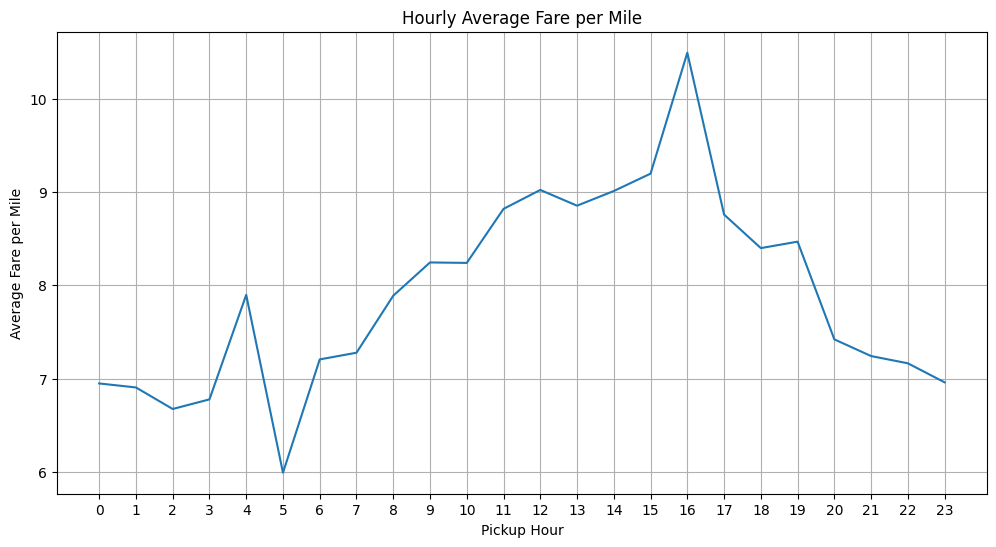

In [200]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_fare_per_mile['tpep_pickup_hour'], hourly_fare_per_mile['fare_per_mile'])
plt.title("Hourly Average Fare per Mile")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Fare per Mile")
plt.xticks(range(24))  # Set x-axis ticks to represent hours
plt.grid(True)
plt.show()

In [201]:
print("\nAverage Fare per Mile by Day of the Week:")
display(dayofweek_fare_per_mile)


Average Fare per Mile by Day of the Week:


tpep_dayofweek  fare_per_mile
0         Monday           7.96
1        Tuesday           8.53
2      Wednesday           8.45
3       Thursday           8.67
4         Friday           8.24
5       Saturday           8.07
6         Sunday           7.80

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [202]:
# Compare fare per mile for different vendors

# Group by vendor and hour of the day
vendor_hourly_fare_per_mile = merged_df.groupby(['VendorID', merged_df['tpep_pickup_hour']])['fare_per_mile'].mean().reset_index()

In [203]:
# Display the results
print("Average Fare per Mile for Different Vendors by Hour of the Day:")
print(vendor_hourly_fare_per_mile)

Average Fare per Mile for Different Vendors by Hour of the Day:
    VendorID  tpep_pickup_hour  fare_per_mile
0          1                 0           6.50
1          1                 1           6.46
2          1                 2           6.50
3          1                 3           6.25
4          1                 4           5.94
5          1                 5           5.91
6          1                 6           6.31
7          1                 7           7.00
8          1                 8           7.85
9          1                 9           8.12
10         1                10           8.22
11         1                11           8.51
12         1                12           8.61
13         1                13           8.49
14         1                14           8.54
15         1                15           8.53
16         1                16           8.47
17         1                17           8.40
18         1                18           8.21
19         1    

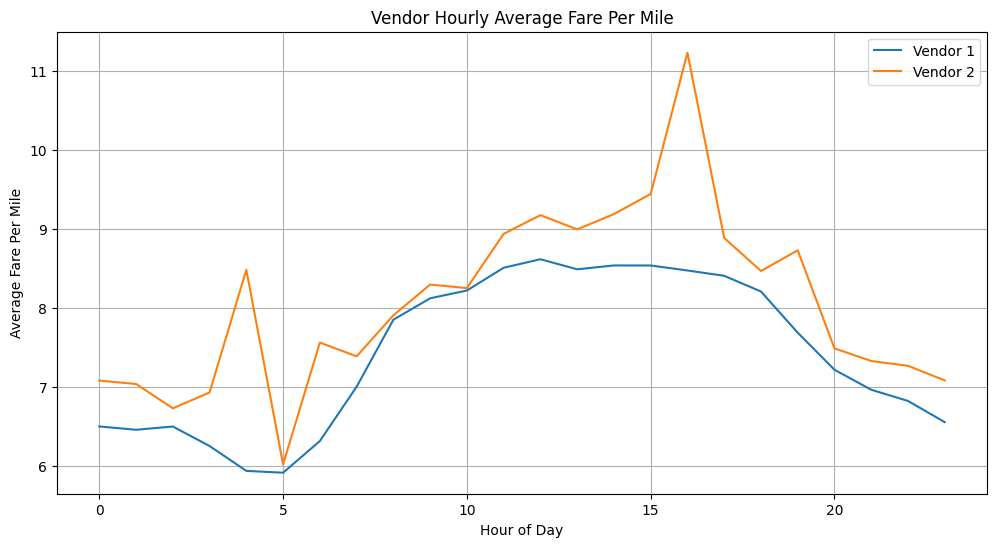

In [204]:
plt.figure(figsize=(12, 6))
for vendor in vendor_hourly_fare_per_mile['VendorID'].unique():
    vendor_data = vendor_hourly_fare_per_mile[vendor_hourly_fare_per_mile['VendorID'] == vendor]
    plt.plot(vendor_data['tpep_pickup_hour'], vendor_data['fare_per_mile'], label=f'Vendor {vendor}')
plt.title("Vendor Hourly Average Fare Per Mile")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare Per Mile")
plt.legend()
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [205]:
# Defining distance tiers

merged_df['distance_tier'] = pd.cut(merged_df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles'])

In [206]:
# Group by vendor and distance tier
vendor_tier_fare_per_mile = merged_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

<ipython-input-206-34409e6fa48a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_tier_fare_per_mile = merged_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()


In [207]:
# Display the results
print("Average Fare per Mile for Different Vendors by Distance Tier:")
display(vendor_tier_fare_per_mile)

Average Fare per Mile for Different Vendors by Distance Tier:


VendorID      distance_tier  fare_per_mile
0         1      Up to 2 miles           9.37
1         1       2 to 5 miles           6.35
2         1  More than 5 miles           4.45
3         2      Up to 2 miles          10.63
4         2       2 to 5 miles           6.54
5         2  More than 5 miles           4.47

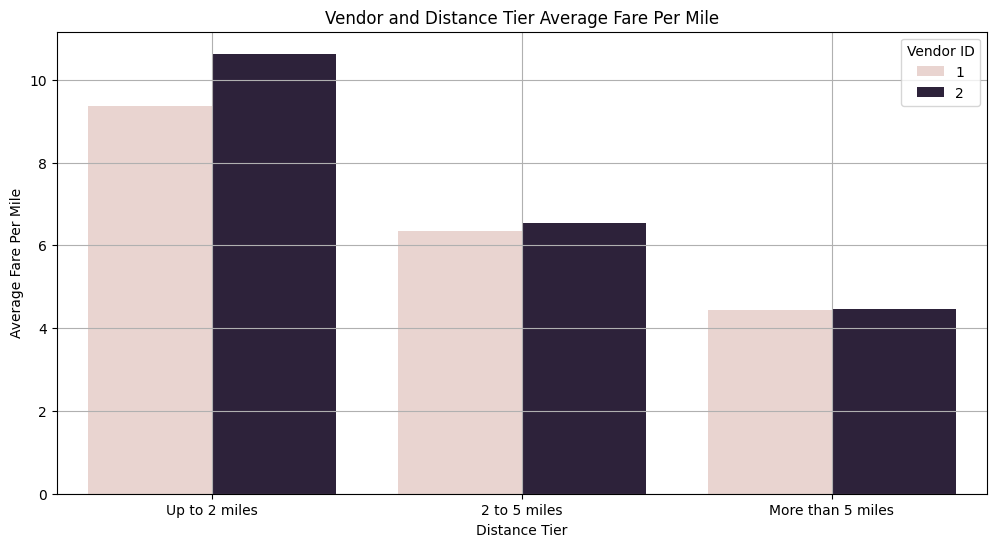

In [208]:
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=vendor_tier_fare_per_mile)
plt.title("Vendor and Distance Tier Average Fare Per Mile")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare Per Mile")
plt.legend(title="Vendor ID")
plt.grid(True)
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [209]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df['tip_percentage'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

In [210]:
avg_tip_by_distance = merged_df.groupby(['distance_tier'])['tip_percentage'].mean().reset_index()

<ipython-input-210-f688f6818b35>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_distance = merged_df.groupby(['distance_tier'])['tip_percentage'].mean().reset_index()


In [211]:
avg_tip_by_passenger = merged_df.groupby(['passenger_count'])['tip_percentage'].mean().reset_index()

In [212]:
avg_tip_by_hour = merged_df.groupby(['tpep_pickup_hour'])['tip_percentage'].mean().reset_index()

In [213]:
avg_tip_by_distance

distance_tier  tip_percentage
0      Up to 2 miles           28.52
1       2 to 5 miles           23.05
2  More than 5 miles           22.00

In [214]:
avg_tip_by_passenger

passenger_count  tip_percentage
0             1.00           25.97
1             2.00           25.70
2             3.00           25.66
3             4.00           25.80
4             5.00           25.94
5             6.00           25.95

In [215]:
avg_tip_by_hour

tpep_pickup_hour  tip_percentage
0                  0           25.51
1                  1           25.74
2                  2           26.06
3                  3           26.13
4                  4           26.08
5                  5           26.11
6                  6           24.82
7                  7           24.90
8                  8           24.85
9                  9           25.14
10                10           25.38
11                11           25.34
12                12           25.22
13                13           25.20
14                14           25.01
15                15           24.86
16                16           26.95
17                17           27.13
18                18           27.45
19                19           27.33
20                20           26.32
21                21           26.14
22                22           25.80
23                23           25.51

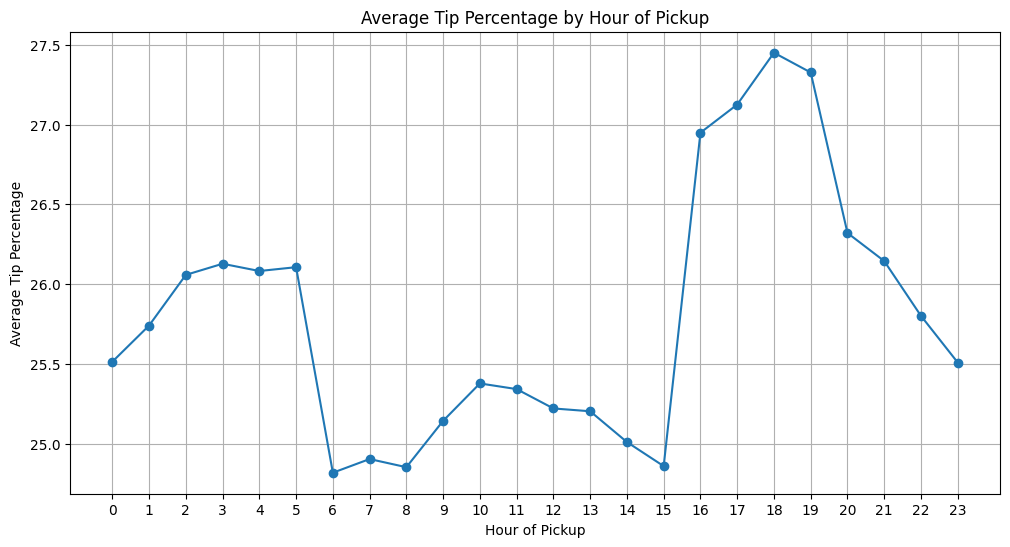

In [216]:
plt.figure(figsize=(12, 6))
plt.plot(avg_tip_by_hour['tpep_pickup_hour'], avg_tip_by_hour['tip_percentage'], marker='o')
plt.title("Average Tip Percentage by Hour of Pickup")
plt.xlabel("Hour of Pickup")
plt.ylabel("Average Tip Percentage")
plt.xticks(range(24))  # Show all hours on x-axis
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [217]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_trips = merged_df[merged_df['tip_percentage'] < 10]
high_tip_trips = merged_df[merged_df['tip_percentage'] > 25]

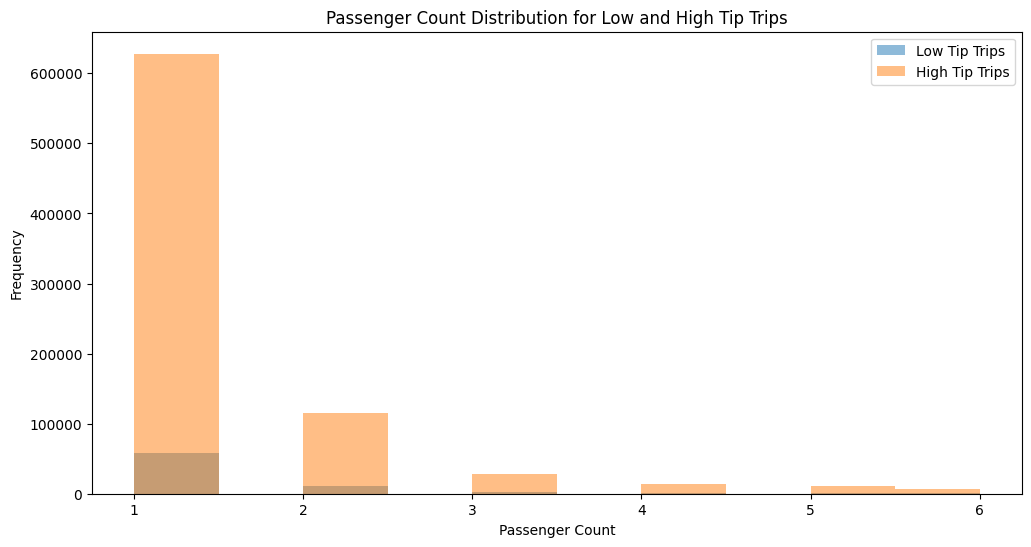

In [218]:
# Compare average trip distance:
avg_distance_low_tip = low_tip_trips['trip_distance'].mean()
avg_distance_high_tip = high_tip_trips['trip_distance'].mean()

# Compare passenger count distribution:
plt.figure(figsize=(12, 6))
plt.hist(low_tip_trips['passenger_count'], alpha=0.5, label="Low Tip Trips")
plt.hist(high_tip_trips['passenger_count'], alpha=0.5, label="High Tip Trips")
plt.title("Passenger Count Distribution for Low and High Tip Trips")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [219]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_date', 'tpep_pickup_hour',
       'airport_fee', 'trip_duration', 'tpep_dayofweek', 'tpep_month',
       'quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID',
       'borough', 'geometry', 'fare_per_mile', 'fare_per_mile_per_passenger',
       'distance_tier', 'tip_percentage'],
      dtype='object')

In [220]:
# See how passenger count varies across hours and days
passenger_count_variation = merged_df.groupby(['tpep_pickup_hour','tpep_dayofweek'])['passenger_count'].mean().reset_index()
passenger_count_variation.columns = ['Hour', 'DayOfWeek', 'AvgPassengerCount']

<ipython-input-220-4bda94140670>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_count_variation = merged_df.groupby(['tpep_pickup_hour','tpep_dayofweek'])['passenger_count'].mean().reset_index()


In [221]:
passenger_count_variation

Hour  DayOfWeek  AvgPassengerCount
0       0     Monday               1.38
1       0    Tuesday               1.38
2       0  Wednesday               1.34
3       0   Thursday               1.35
4       0     Friday               1.40
5       0   Saturday               1.47
6       0     Sunday               1.49
7       1     Monday               1.42
8       1    Tuesday               1.38
9       1  Wednesday               1.34
10      1   Thursday               1.37
11      1     Friday               1.38
12      1   Saturday               1.46
13      1     Sunday               1.48
14      2     Monday               1.35
15      2    Tuesday               1.40
16      2  Wednesday               1.34
17      2   Thursday               1.41
18      2     Friday               1.39
19      2   Saturday               1.48
20      2     Sunday               1.47
21      3     Monday               1.53
22      3    Tuesday               1.42
23      3  Wednesday               1.39
24      3   Thursday               1.41
25      3     Friday               1.42
26      3   Saturday               1.46
27      3     Sunday               1.46
28      4     Monday               1.46
29      4    Tuesday               1.32
30      4  Wednesday               1.39
31      4   Thursday               1.38
32      4     Friday               1.34
33      4   Saturday               1.42
34      4     Sunday               1.46
35      5     Monday               1.28
36      5    Tuesday               1.30
37      5  Wednesday               1.22
38      5   Thursday               1.24
39      5     Friday               1.30
40      5   Saturday               1.29
41      5     Sunday               1.38
42      6     Monday               1.26
43      6    Tuesday               1.21
44      6  Wednesday               1.23
45      6   Thursday               1.22
46      6     Friday               1.27
47      6   Saturday               1.30
48      6     Sunday               1.35
49      7     Monday               1.27
50      7    Tuesday               1.26
51      7  Wednesday               1.25
52      7   Thursday               1.27
53      7     Friday               1.28
54      7   Saturday               1.30
55      7     Sunday               1.36
56      8     Monday               1.28
57      8    Tuesday               1.26
58      8  Wednesday               1.26
59      8   Thursday               1.27
60      8     Friday               1.29
61      8   Saturday               1.35
62      8     Sunday               1.38
63      9     Monday               1.30
64      9    Tuesday               1.27
65      9  Wednesday               1.26
66      9   Thursday               1.26
67      9     Friday               1.29
68      9   Saturday               1.37
69      9     Sunday               1.42
70     10     Monday               1.33
71     10    Tuesday               1.30
72     10  Wednesday               1.29
73     10   Thursday               1.30
74     10     Friday               1.35
75     10   Saturday               1.41
76     10     Sunday               1.44
77     11     Monday               1.36
78     11    Tuesday               1.29
79     11  Wednesday               1.30
80     11   Thursday               1.33
81     11     Friday               1.35
82     11   Saturday               1.43
83     11     Sunday               1.43
84     12     Monday               1.36
85     12    Tuesday               1.31
86     12  Wednesday               1.31
87     12   Thursday               1.32
88     12     Friday               1.35
89     12   Saturday               1.45
90     12     Sunday               1.47
91     13     Monday               1.36
92     13    Tuesday               1.30
93     13  Wednesday               1.31
94     13   Thursday               1.33
95     13     Friday               1.35
96     13   Saturday               1.45
97     13     Sunday               1.46
98     14     Monday               1.36
99   

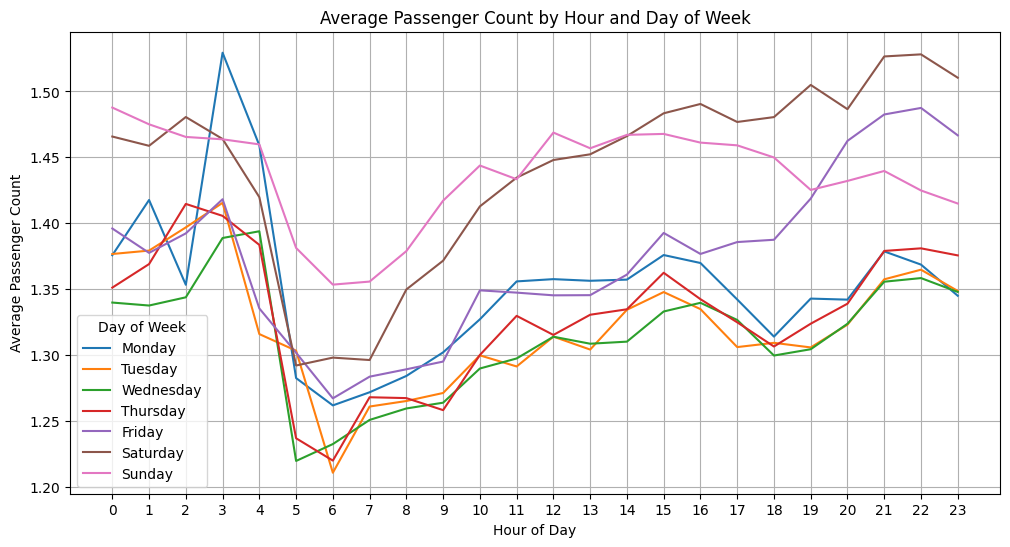

In [222]:
plt.figure(figsize=(12, 6))
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    day_data = passenger_count_variation[passenger_count_variation['DayOfWeek'] == day]
    plt.plot(day_data['Hour'], day_data['AvgPassengerCount'], label=day)  # Plot for each day

plt.title("Average Passenger Count by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(24))
plt.legend(title="Day of Week", labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Customize legend
plt.grid(True)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [223]:
# How does passenger count vary across zones
passenger_count_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
passenger_count_by_zone.columns = ['PULocationID', 'AvgPassengerCount']

In [224]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
passenger_count_zone_data = df_zones.merge(passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

In [225]:
import plotly.express as px

fig = px.bar(passenger_count_zone_data, x='zone', y='AvgPassengerCount', title="Average Passenger Count by Taxi Zone")
fig.update_layout(xaxis={'categoryorder': 'total descending'})  # Sort bars in descending order
fig.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [226]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_date', 'tpep_pickup_hour',
       'airport_fee', 'trip_duration', 'tpep_dayofweek', 'tpep_month',
       'quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID',
       'borough', 'geometry', 'fare_per_mile', 'fare_per_mile_per_passenger',
       'distance_tier', 'tip_percentage'],
      dtype='object')

In [227]:
# How often is each surcharge applied?
merged_df['has_extra_charges'] = merged_df['extra'] > 0

In [228]:
extra_charges_by_zone_hour = merged_df.groupby(['PULocationID','tpep_pickup_hour'])['has_extra_charges'].sum().reset_index()
extra_charges_by_zone_hour.columns = ['LocationID', 'PickupHour', 'ExtraChargesCount']

In [229]:
extra_charges_zone_hour_data = df_zones.merge(extra_charges_by_zone_hour, on='LocationID', how='inner')

In [230]:
high_frequency_zone_hours = extra_charges_zone_hour_data[extra_charges_zone_hour_data['ExtraChargesCount'] > 0].sort_values(by=['ExtraChargesCount'], ascending=False)

In [231]:
top_zones = high_frequency_zone_hours.head(10)  # Get top 10 zones

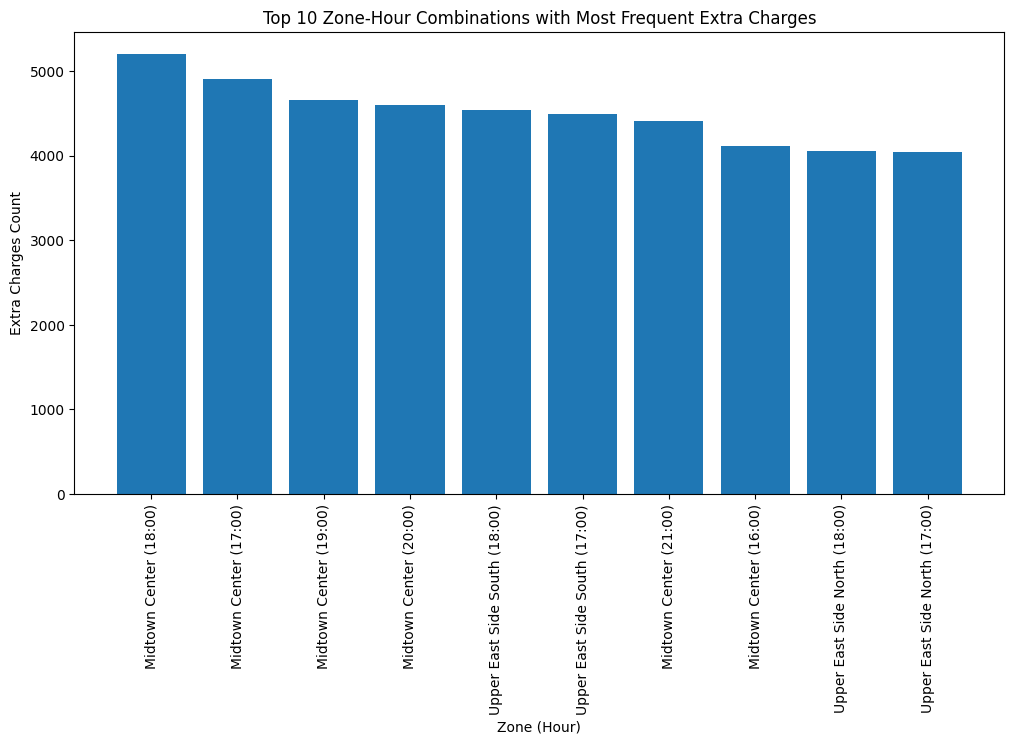

In [232]:
x_labels = [f"{zone} ({hour:02d}:00)" for zone, hour in zip(top_zones['zone'], top_zones['PickupHour'])]

plt.figure(figsize=(12, 6))
plt.bar(x_labels, top_zones['ExtraChargesCount'])
plt.title("Top 10 Zone-Hour Combinations with Most Frequent Extra Charges")
plt.xlabel("Zone (Hour)")
plt.ylabel("Extra Charges Count")
plt.xticks(rotation=90)
plt.show()

In [233]:
extra_charges_by_zone_hour = merged_df.groupby(['PULocationID',merged_df['tpep_dropoff_datetime'].dt.hour])['has_extra_charges'].sum().reset_index()
extra_charges_by_zone_hour.columns = ['LocationID', 'DropoffHour', 'ExtraChargesCount']

In [234]:
extra_charges_zone_hour_data = df_zones.merge(extra_charges_by_zone_hour, on='LocationID', how='inner')

In [235]:
high_frequency_zone_hours = extra_charges_zone_hour_data[extra_charges_zone_hour_data['ExtraChargesCount'] > 0].sort_values(by=['ExtraChargesCount'], ascending=False)

In [236]:
top_zones = high_frequency_zone_hours.head(10)  # Get top 10 zones

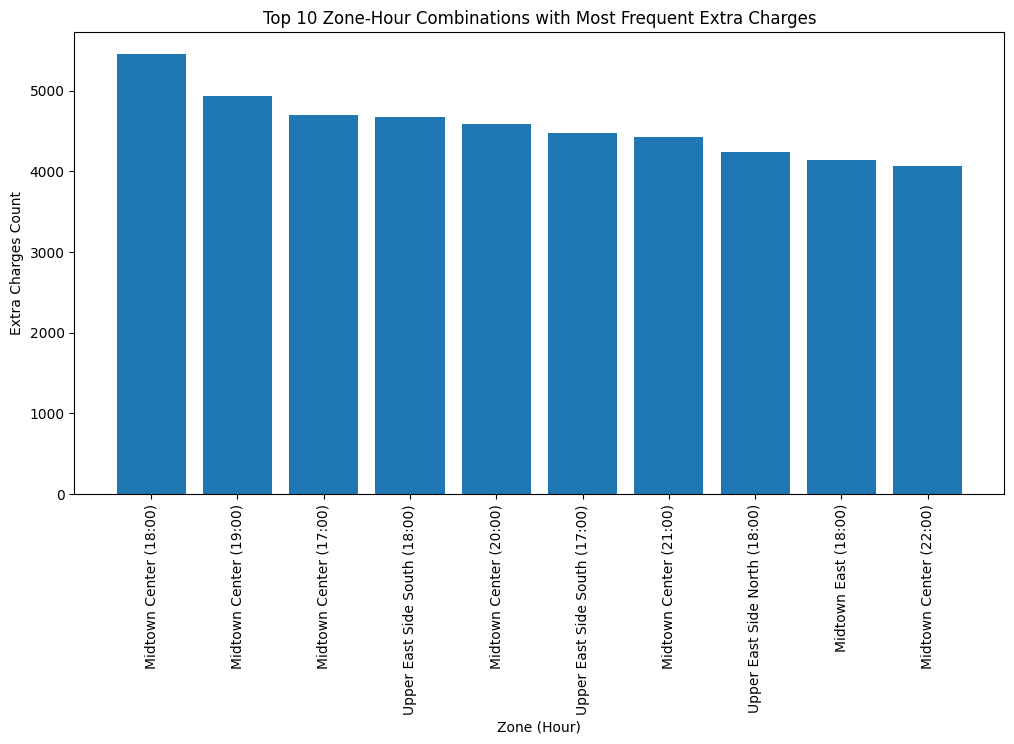

In [237]:
x_labels = [f"{zone} ({hour:02d}:00)" for zone, hour in zip(top_zones['zone'], top_zones['DropoffHour'])]

plt.figure(figsize=(12, 6))
plt.bar(x_labels, top_zones['ExtraChargesCount'])
plt.title("Top 10 Zone-Hour Combinations with Most Frequent Extra Charges")
plt.xlabel("Zone (Hour)")
plt.ylabel("Extra Charges Count")
plt.xticks(rotation=90)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1.   Data shows a significant surge in trip numbers between 11 AM and 10 PM. vendors
are recommended to deploy a greater number of taxis during these peak hours to minimize passenger wait times, maximize service utilization, and improve overall efficiency.
2.  
Weekday Variations: Thursdays emerge as the busiest weekday, while Mondays experience lower demand. Consider adjusting the number of active taxis based on these daily fluctuations. Implementing a driver scheduling system could further optimize driver availability and reduce idle time.
3. Daytime vs. Nighttime: Daytime trips significantly outnumber nighttime trips. While maintaining 24/7 availability is crucial, introducing driver scheduling for nighttime hours can ensure efficient coverage while optimizing driver resources.
4.
Seasonal Adjustments: May and October exhibit higher taxi demand compared to other months. We recommend proactively increasing the taxi fleet during these periods to accommodate the surge in passenger needs.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.



1.   Data shows airports are highly congested areas with slow traffic, hence the vendors can proactively change routing strategies to avoid these areas unless required
2.   Alphabet City, AStoria,battery park city, Blooming Dale, Boerum hill are in top 10 pickup and dropoff zones. During peak hours (11 AM to 10 PM) and busiest days (Thursdays), strategically increase the concentration of cabs in these areas
3. During off-peak hours and quieter days (Mondays), consider reducing the number of cabs in low-demand zones to minimize idle time and fuel consumption.
3. In nighttime the zones with higher pickup and dropoff rate changes to East Village, Clinton East, West Village and airports( specially JFK and Laguardia).Vendors can change their cab positioning accordingly
4. Number of trips are more during daytime compare to nighttime



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Implement surge pricing during peak hours (11 AM to 10 PM) and on busiest days (Thursdays) in busy zones like Midtown center and Upper east side north , when demand is high and taxi availability may be limited. This will urge drivers to operate during these periods, increase revenue, and manage passenger demand.
2.Consider offering discounts or promotions during off-peak hours and on quieter days (Mondays) to encourage ridership and maximize taxi utilization during periods of lower demand.
3. Implement zone-based pricing, adjusting fares based on the pickup and drop-off locations. This can account for variations in demand, travel times, and operational costs associated with different zones. Zones with higher demand or longer travel times could have slightly higher fares, while zones with lower demand could offer discounted rates.
4. Pasengers tend to tip more during peak hours, hence consider adding more cabs during this hour to maximize revenue